In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [3]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
    home = '/Users/67981492/'

In [4]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [5]:
all_obs_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

In [6]:
all_obs_data.head(10)

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,ID,b_t0,b_t1,r_t1,...,epoch_trial_zero_idx,epoch_trial_one_idx,shifted_epoch_trial_zero_idx,repeat_trial,prop_112,n_epoch_trials,p_id_solution,obs_low_val_cue,id_choice,p_id_accuracy
0,0.099471,0.000000,0.000000,1,0.013572,0.416406,761,0.000000,0.000000,2.528877,...,0,1,0,1,0.305556,36,111,111,111,1
1,0.035079,0.000000,0.000000,0,0.013572,0.599471,761,1.390214,0.149207,0.000000,...,1,2,1,2,0.305556,36,111,112,112,0
2,0.023075,-1.241007,1.241007,0,0.013572,0.535079,761,0.792372,0.196591,0.000000,...,2,3,2,3,0.305556,36,111,112,111,1
3,0.019881,-0.595781,0.595781,0,-1.000000,0.523075,761,0.532802,0.226667,0.000000,...,3,4,3,4,0.305556,36,111,112,112,0
4,0.018539,-0.306135,0.306135,0,-1.000000,0.519881,761,0.391376,0.251982,0.000000,...,4,5,4,5,0.305556,36,111,112,111,1
5,0.268538,-0.139394,0.139394,0,-1.000000,0.518539,761,0.302804,0.275119,3.036967,...,5,6,5,6,0.305556,36,111,111,111,1
6,0.035630,-0.027685,0.027685,0,-1.000000,0.768538,761,1.408409,0.604046,0.000000,...,6,7,6,7,0.305556,36,111,112,111,1
7,0.785155,-0.804363,0.804363,0,-1.000000,0.535630,761,0.571150,0.635969,4.661588,...,7,8,7,8,0.305556,36,111,111,111,1
8,0.352873,0.064818,-0.064818,0,-1.000000,1.285155,761,4.114561,1.314367,-0.099227,...,8,9,8,9,0.305556,36,111,111,111,1
9,0.206726,-2.800194,2.800194,0,-0.935182,0.852873,761,0.822059,1.379872,4.103838,...,9,10,9,10,0.305556,36,111,111,112,0


In [7]:
all_obs_data.columns = all_obs_data.columns.str.strip()
all_obs_data.head()

,cpp,target_B,choice_B,cp,gen_drift,gen_bound,ID,b_t0,b_t1,r_t1,...,epoch_trial_zero_idx,epoch_trial_one_idx,shifted_epoch_trial_zero_idx,repeat_trial,prop_112,n_epoch_trials,p_id_solution,obs_low_val_cue,id_choice,p_id_accuracy
0,0.099471,0.000000,0.000000,1,0.013572,0.416406,761,0.000000,0.000000,2.528877,...,0,1,0,1,0.305556,36,111,111,111,1
1,0.035079,0.000000,0.000000,0,0.013572,0.599471,761,1.390214,0.149207,0.000000,...,1,2,1,2,0.305556,36,111,112,112,0
2,0.023075,-1.241007,1.241007,0,0.013572,0.535079,761,0.792372,0.196591,0.000000,...,2,3,2,3,0.305556,36,111,112,111,1
3,0.019881,-0.595781,0.595781,0,-1.000000,0.523075,761,0.532802,0.226667,0.000000,...,3,4,3,4,0.305556,36,111,112,112,0
4,0.018539,-0.306135,0.306135,0,-1.000000,0.519881,761,0.391376,0.251982,0.000000,...,4,5,4,5,0.305556,36,111,112,111,1


In [8]:
all_obs_data.columns

Index(['cpp', 'target_B', 'choice_B', 'cp', 'gen_drift', 'gen_bound', 'ID',
       'b_t0', 'b_t1', 'r_t1', 'r_t2', 'obs_cp', 'ideal_B', 'B_ideal_target',
       'B_nonideal_target', 'LR_choice', 'obs_LR_accuracy', 'obs_LR_solution',
       'reward', 'cumulative_reward', 'rt', 'total_trial_time', 'iti',
       'cp_with_slow_fast', 'obs_cp_with_slow_fast', 'obs_high_val_cue',
       'ID.1', 'condition', 'coded_condition', 'original_trial', 'epoch_n',
       'epoch_trial', 'shifted_epoch_trial', 'max_epoch_n',
       'epoch_trial_zero_idx', 'epoch_trial_one_idx',
       'shifted_epoch_trial_zero_idx', 'repeat_trial', 'prop_112',
       'n_epoch_trials', 'p_id_solution', 'obs_low_val_cue', 'id_choice',
       'p_id_accuracy'],
      dtype='object')

In [9]:
test_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

Text(0,0.5,'cumulative_reward')

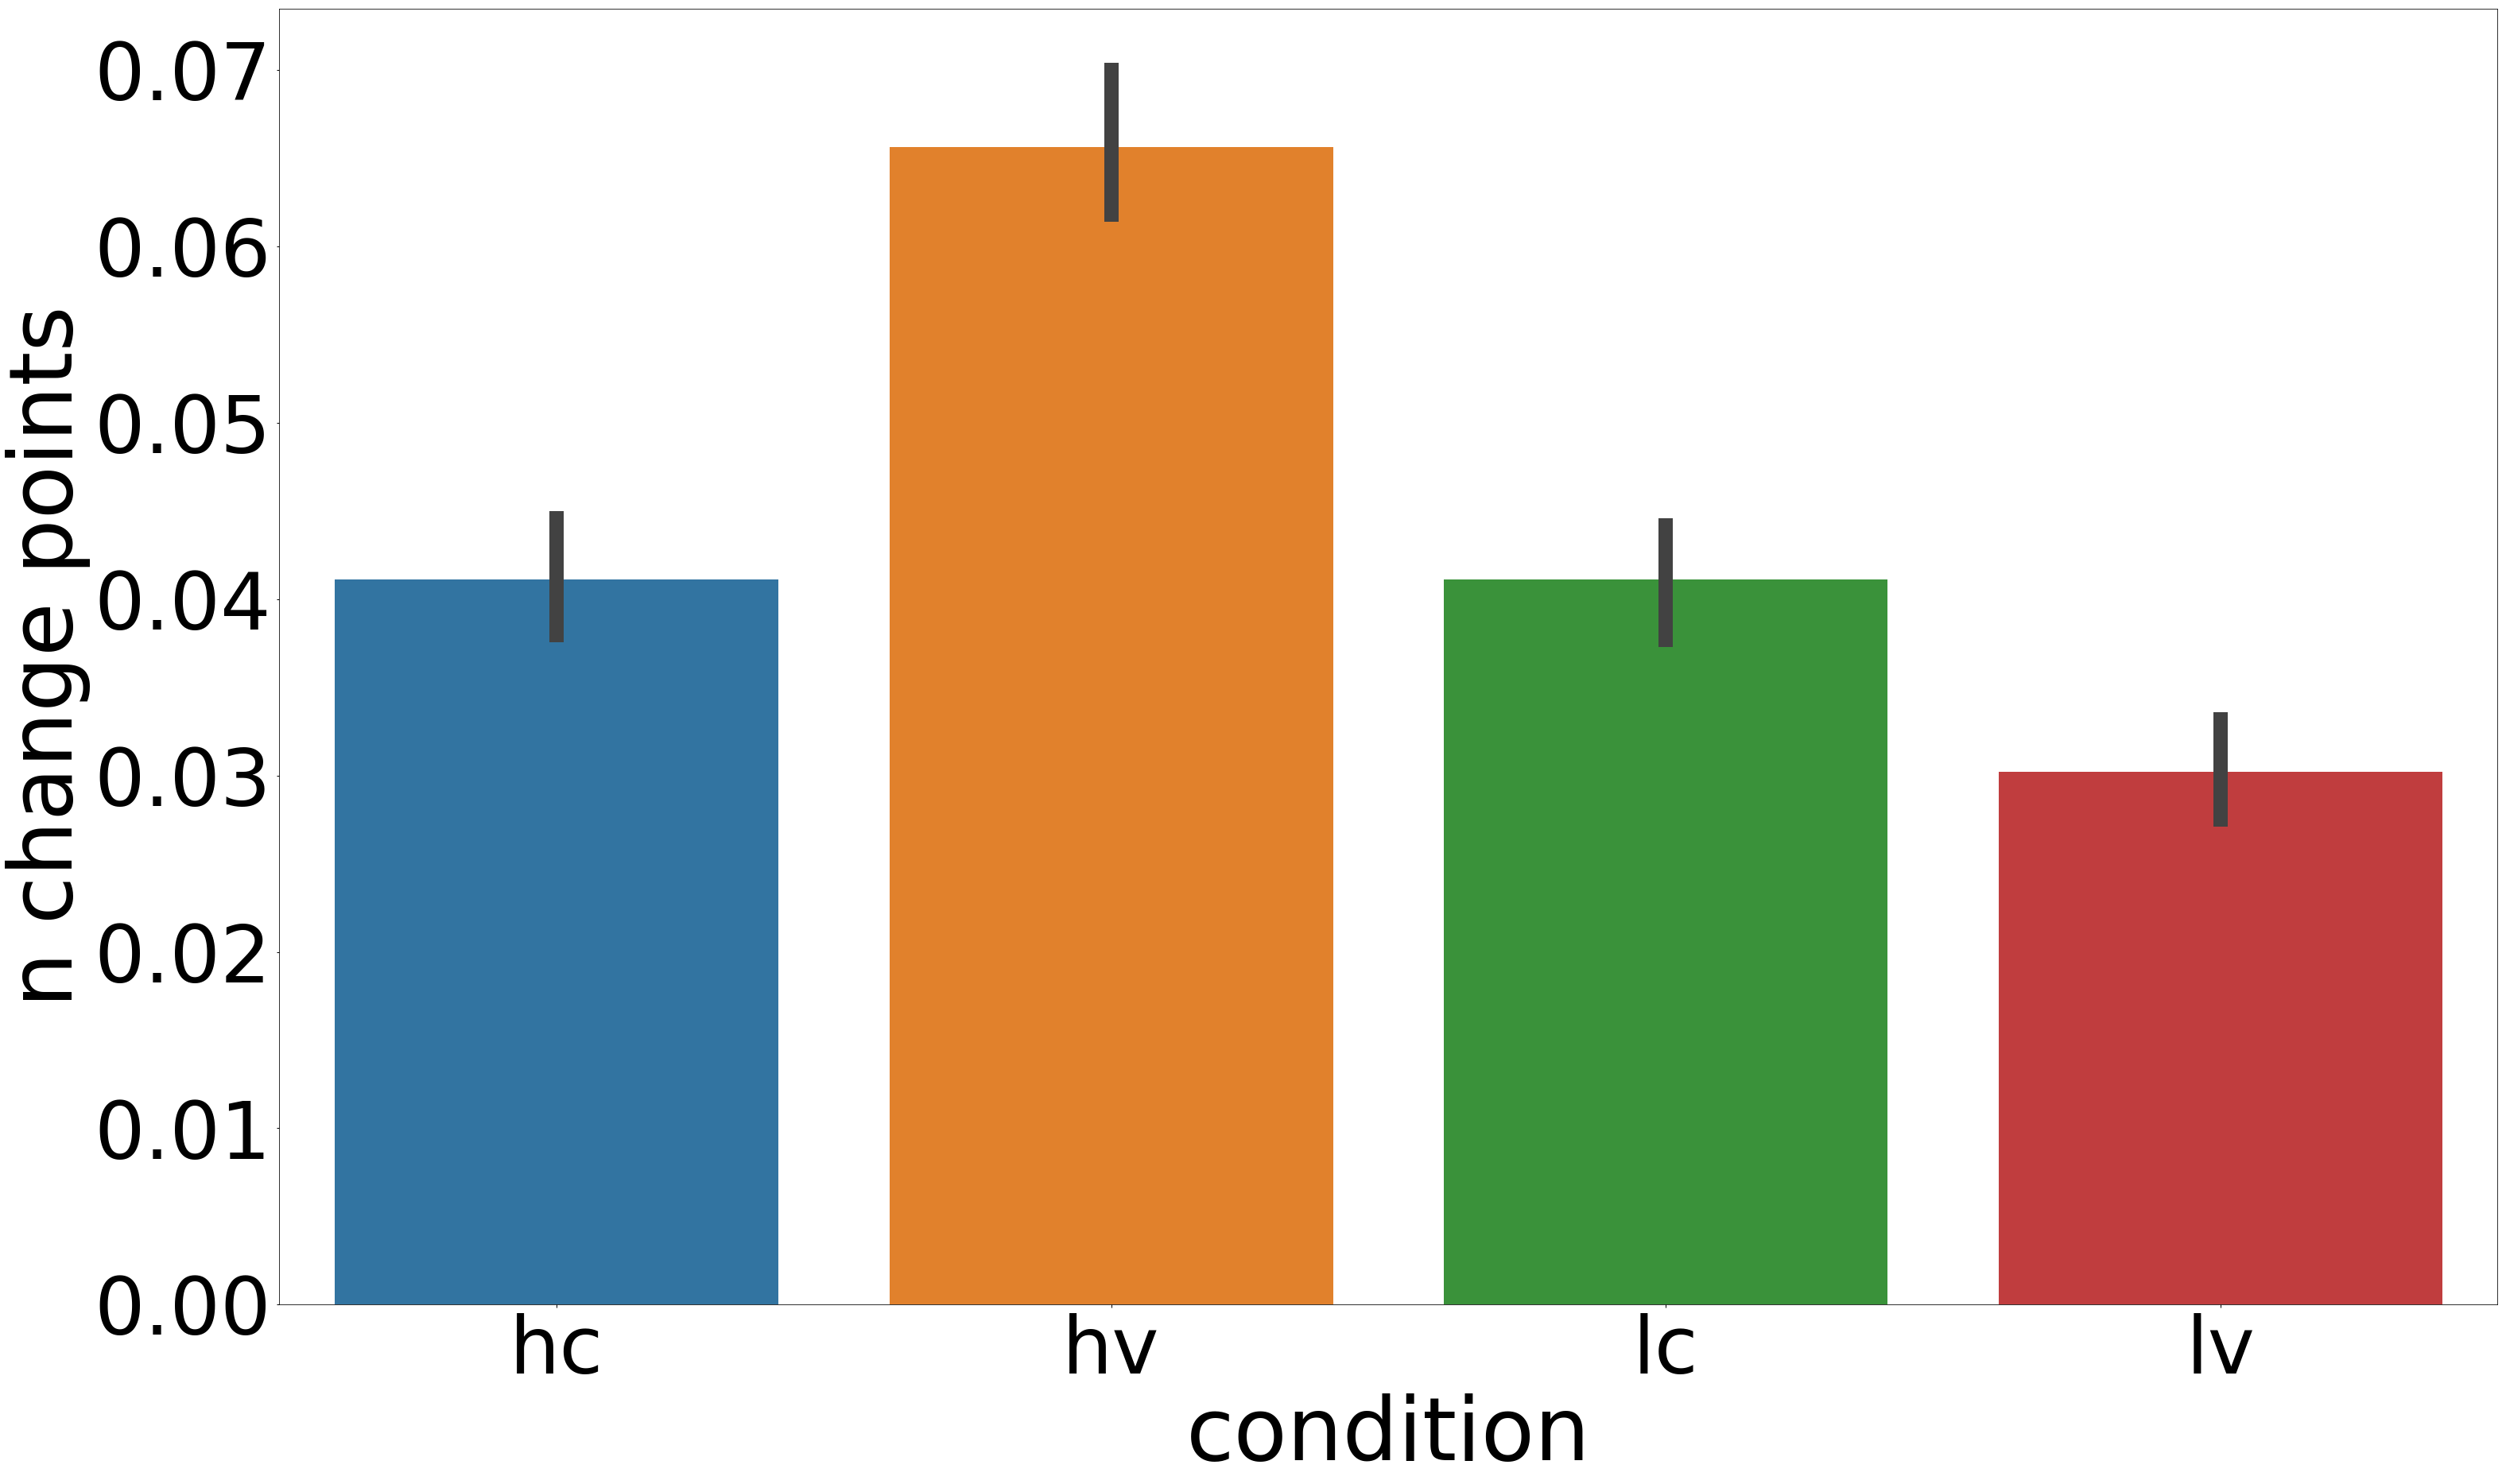

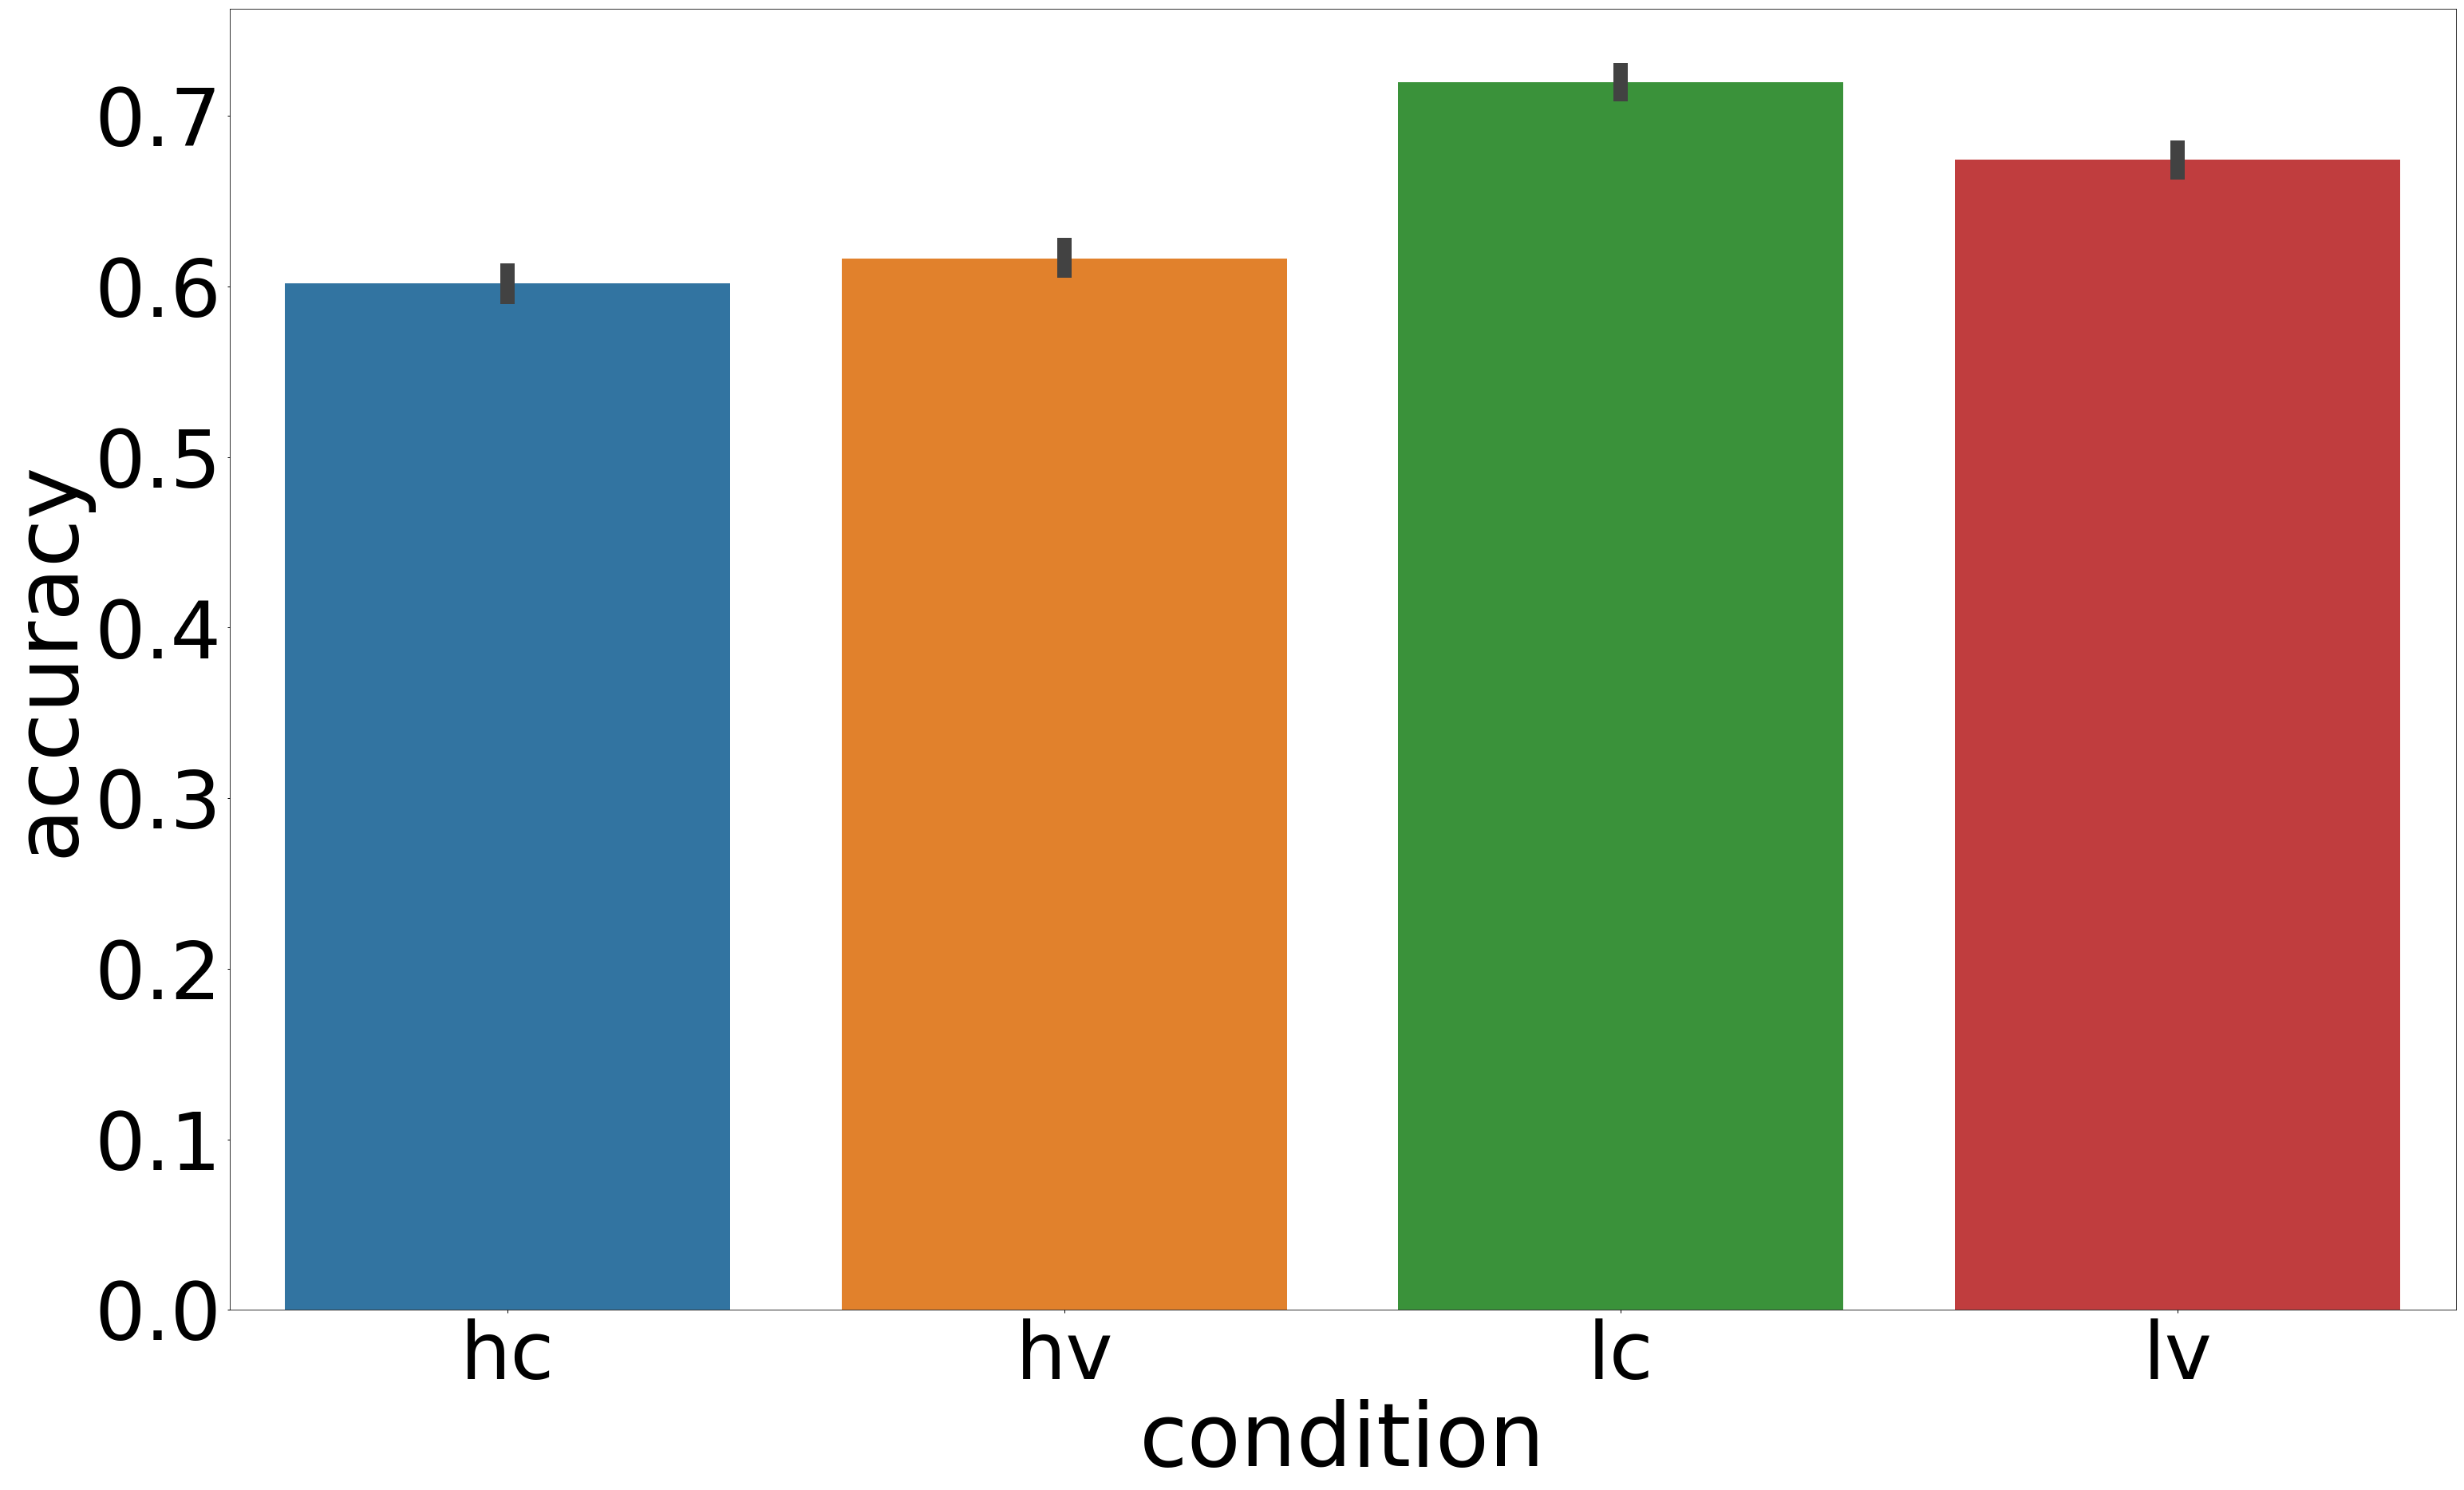

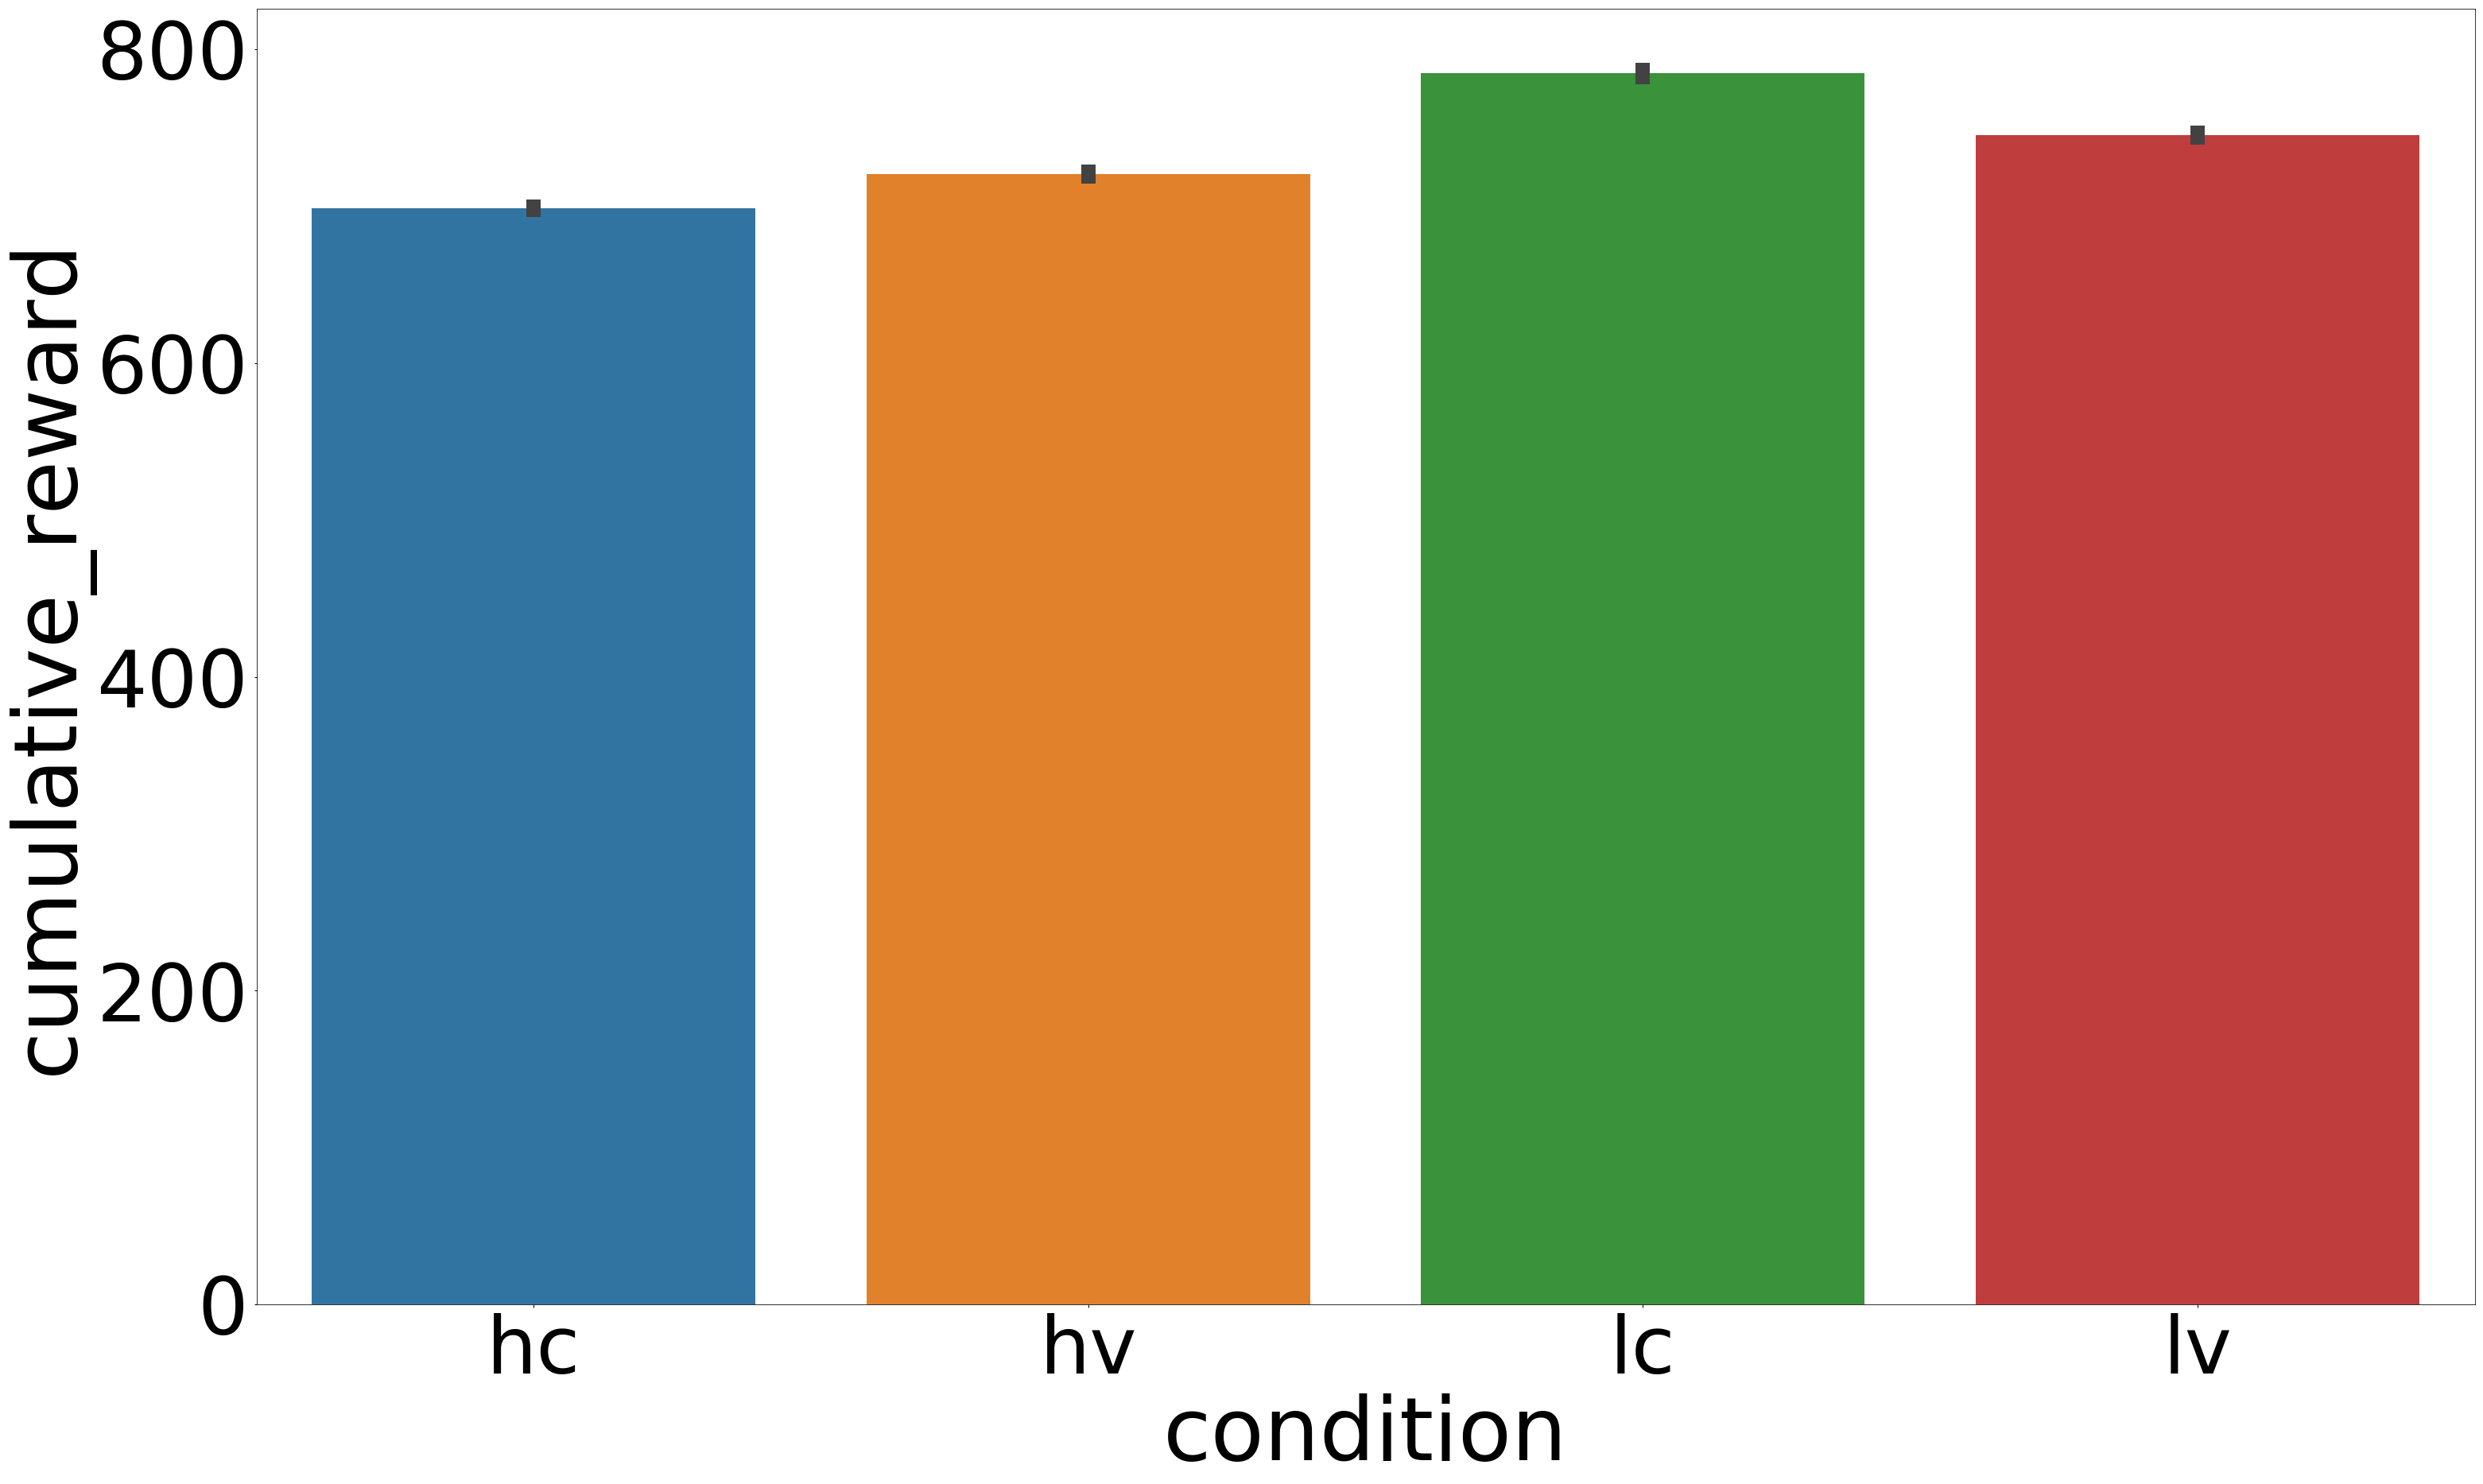

In [10]:
plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="cp_with_slow_fast", data=test_data, ci=95, n_boot=1000)
plt.ylabel('n change points')

plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="p_id_accuracy", data=test_data, ci=95, n_boot=1000)
plt.ylabel('accuracy')

plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="cumulative_reward", data=test_data, ci=95, n_boot=1000)
plt.ylabel('cumulative_reward')

Text(0,0.5,'$\\Omega$')

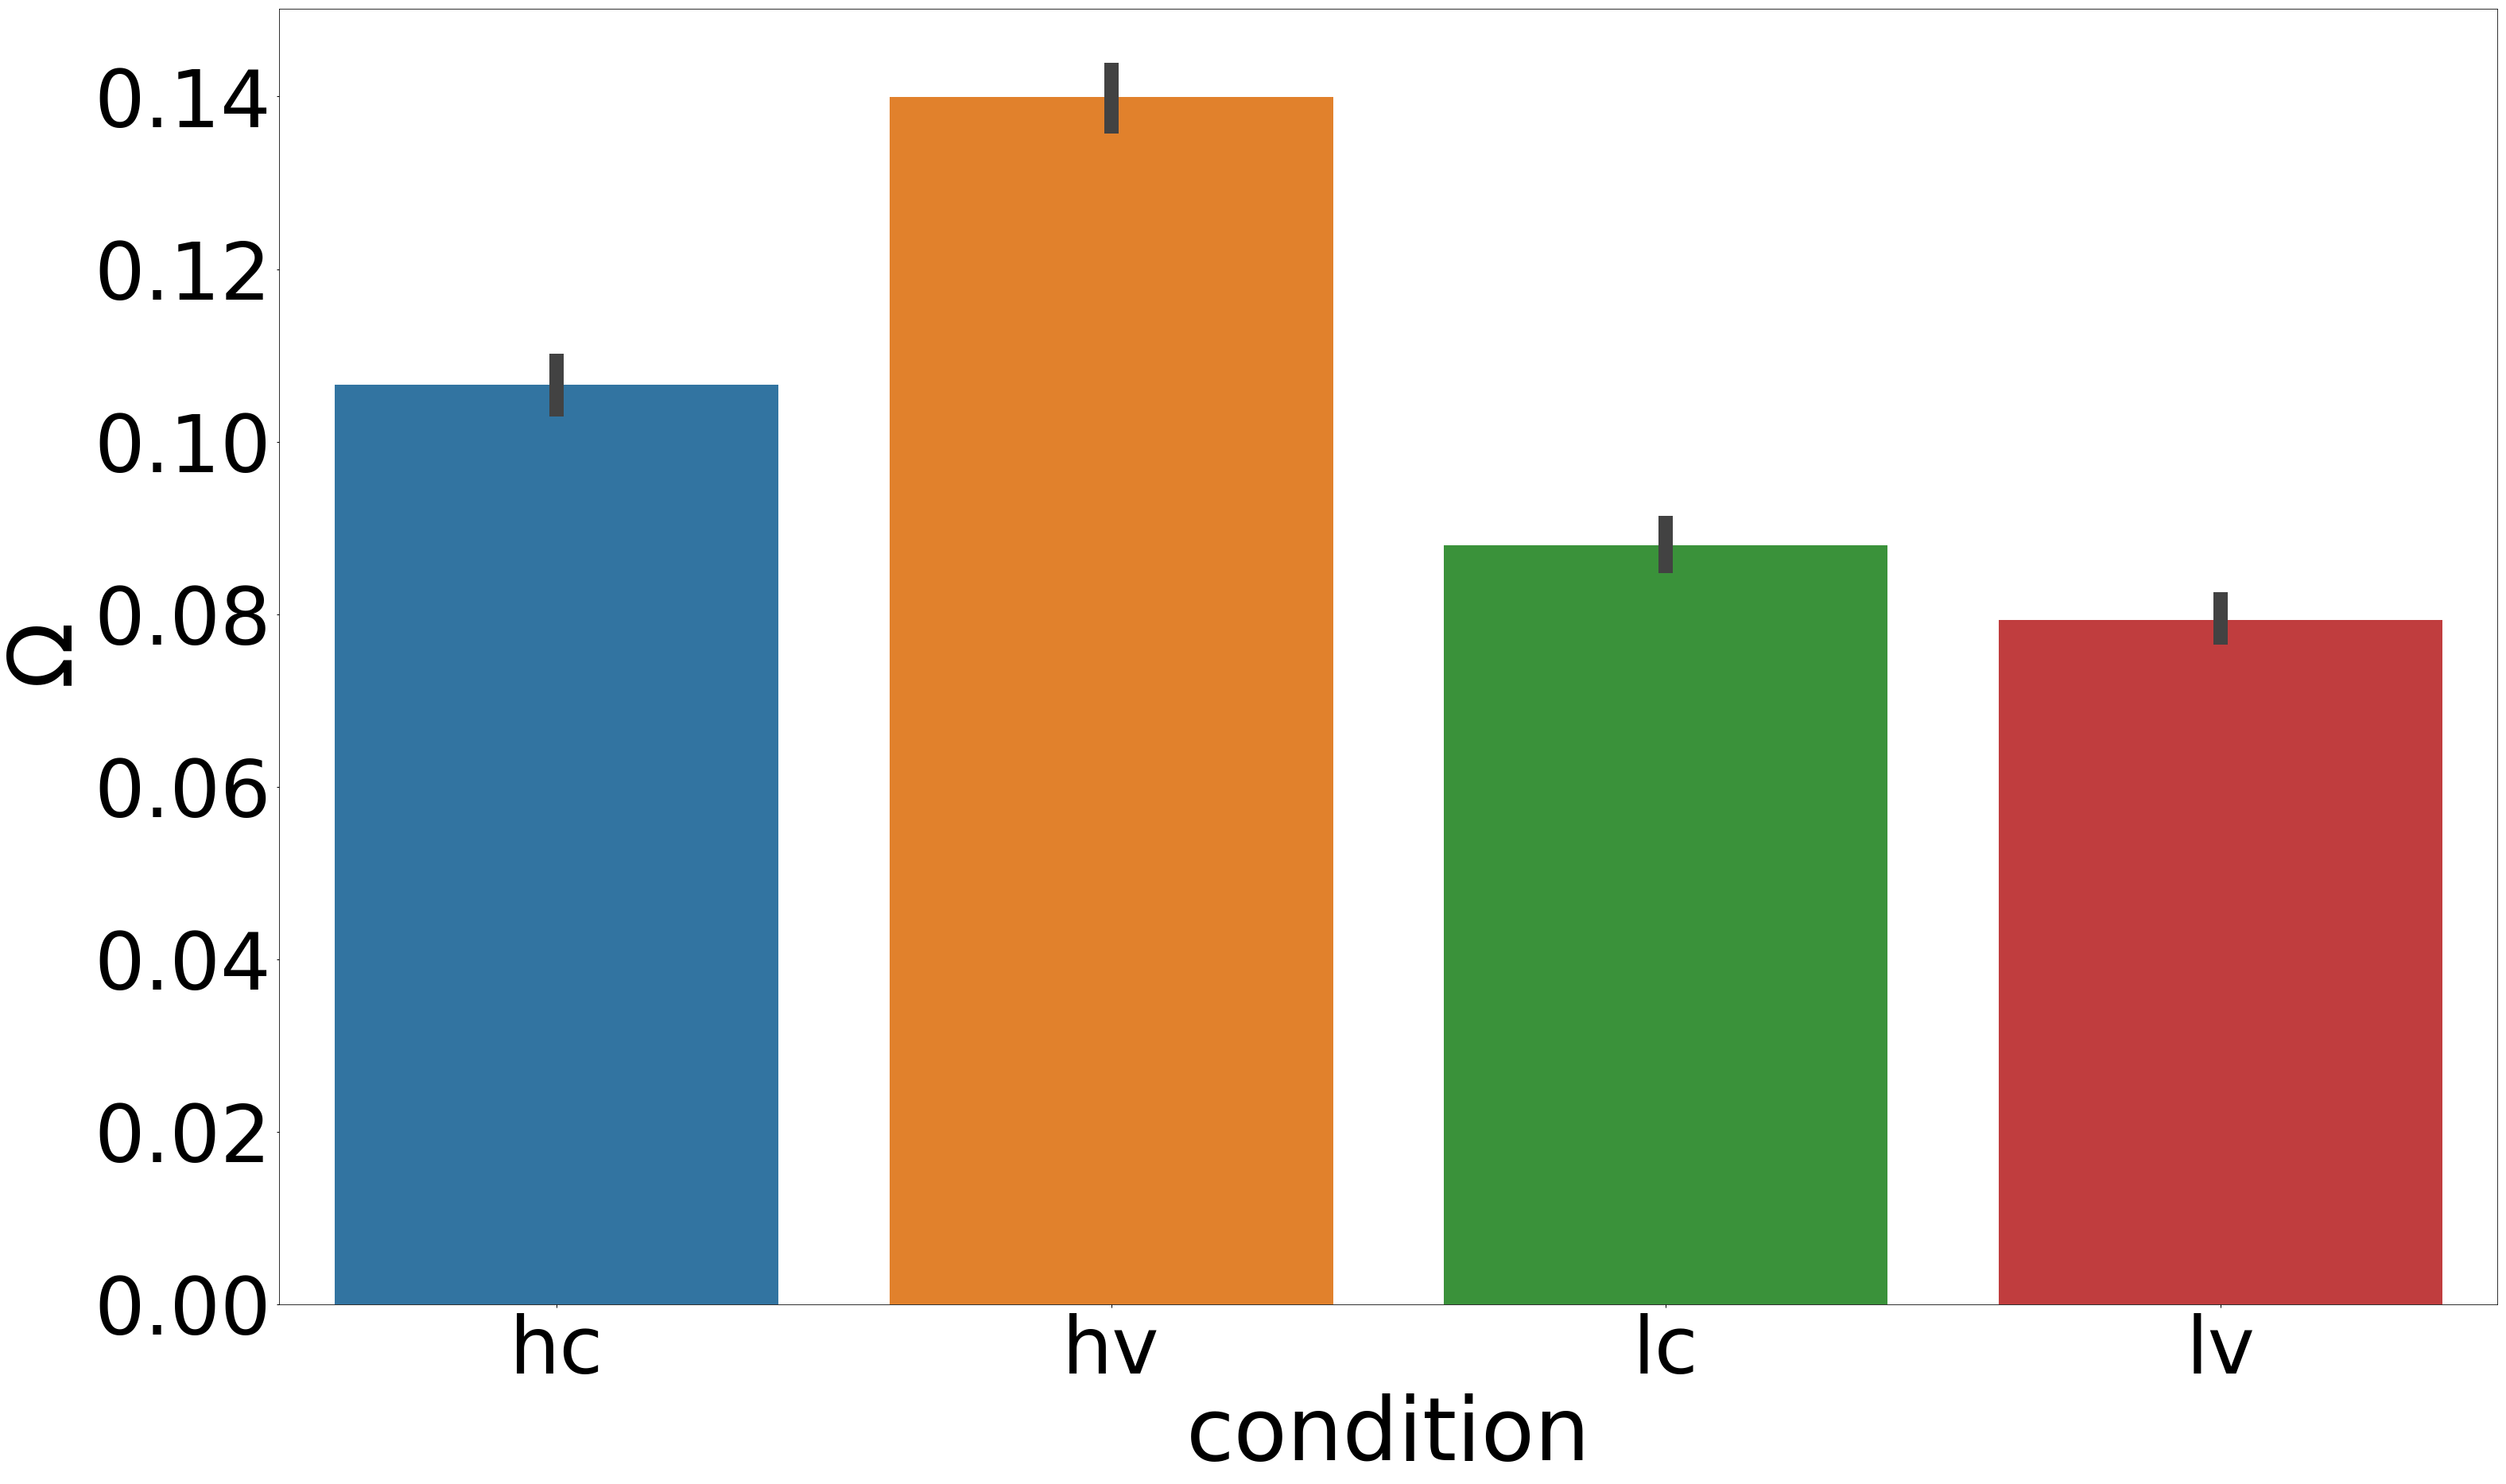

In [11]:
plt.figure(figsize=(50,30))
sns.barplot(x="condition",y="cpp", data=all_obs_data, ci=95, n_boot=1000)
plt.ylabel('$\Omega$')

In [12]:
np.unique(all_obs_data.id_choice)

array([111, 112])

In [13]:
all_obs_data.loc[all_obs_data.id_choice == 111, 'id_choice'] = 0
all_obs_data.loc[all_obs_data.id_choice == 112, 'id_choice'] = 1

In [14]:
all_obs_data.loc[all_obs_data.p_id_solution == 111, 'p_id_solution'] = 0
all_obs_data.loc[all_obs_data.p_id_solution == 112, 'p_id_solution'] = 1

In [15]:
all_obs_data_sample_lc = all_obs_data[(all_obs_data.condition == 'lc') & (all_obs_data.ID == 761)] 

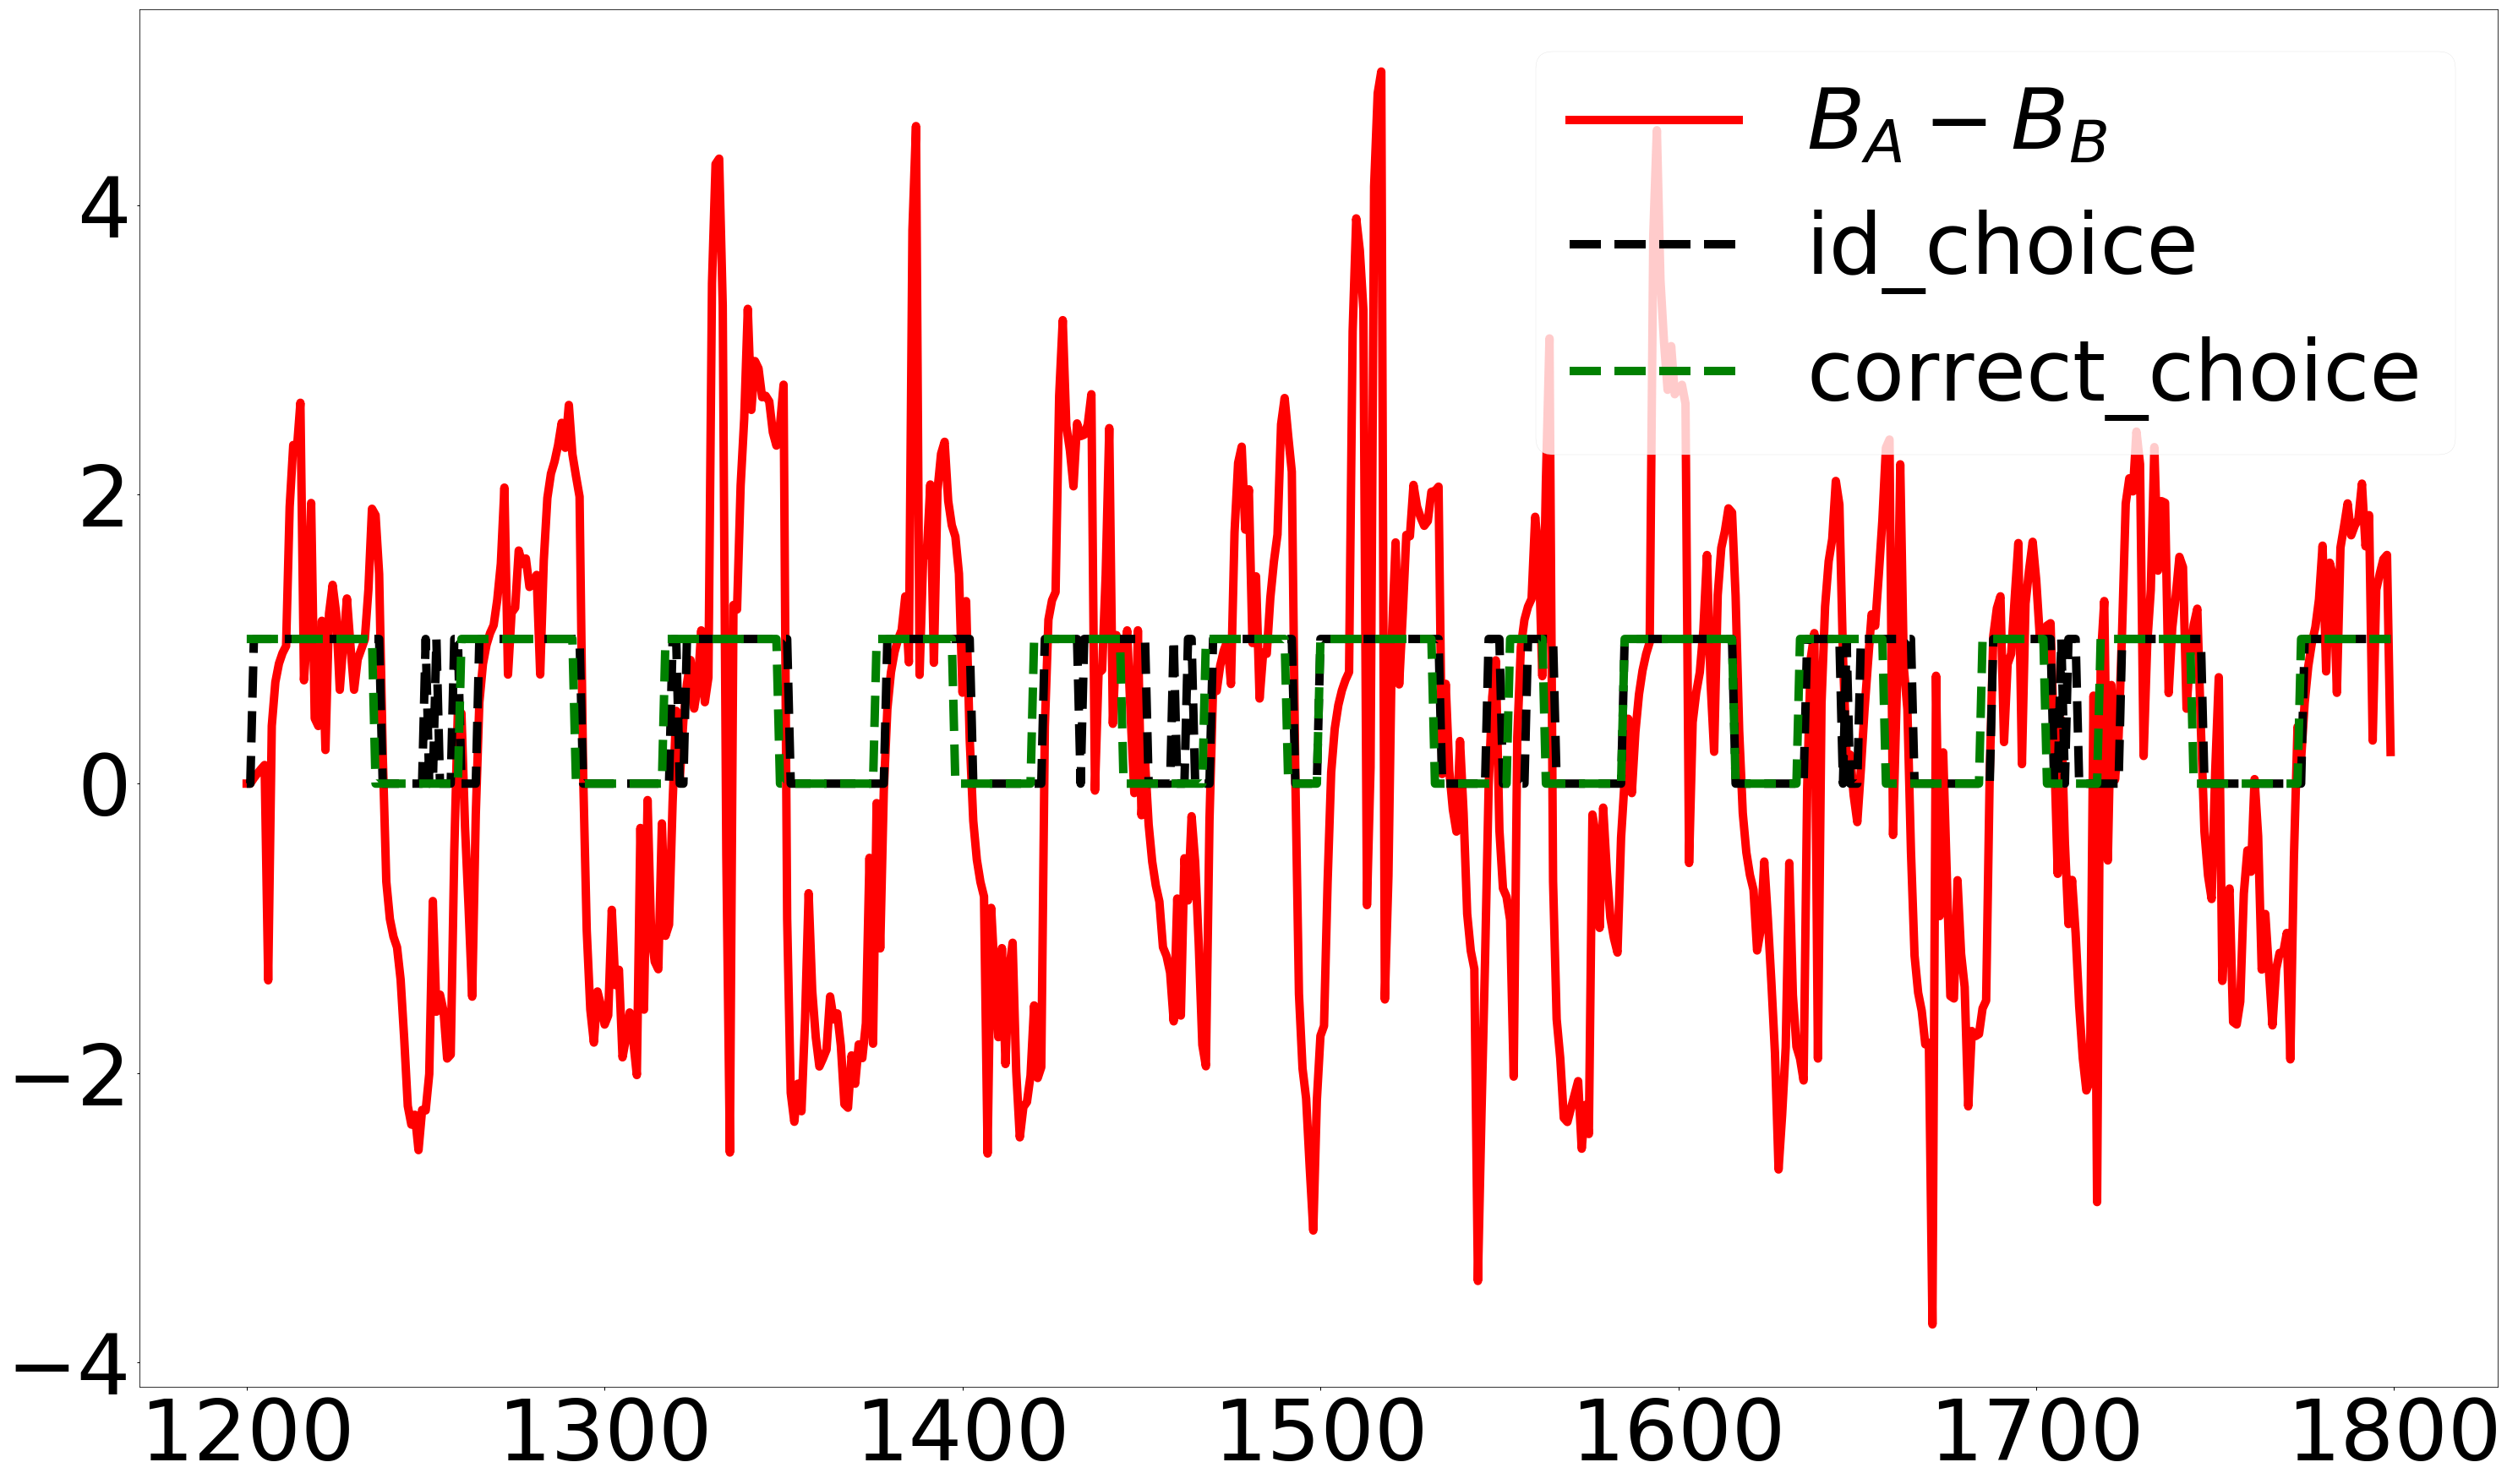

In [16]:
#use a low conflict sample to test direction
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lc.target_B, 'r', label='$B_{A} - B_{B}$')
plt.plot(all_obs_data_sample_lc.id_choice, 'k--', label='id_choice')
plt.plot(all_obs_data_sample_lc.p_id_solution, 'g--', label='correct_choice')
plt.legend()

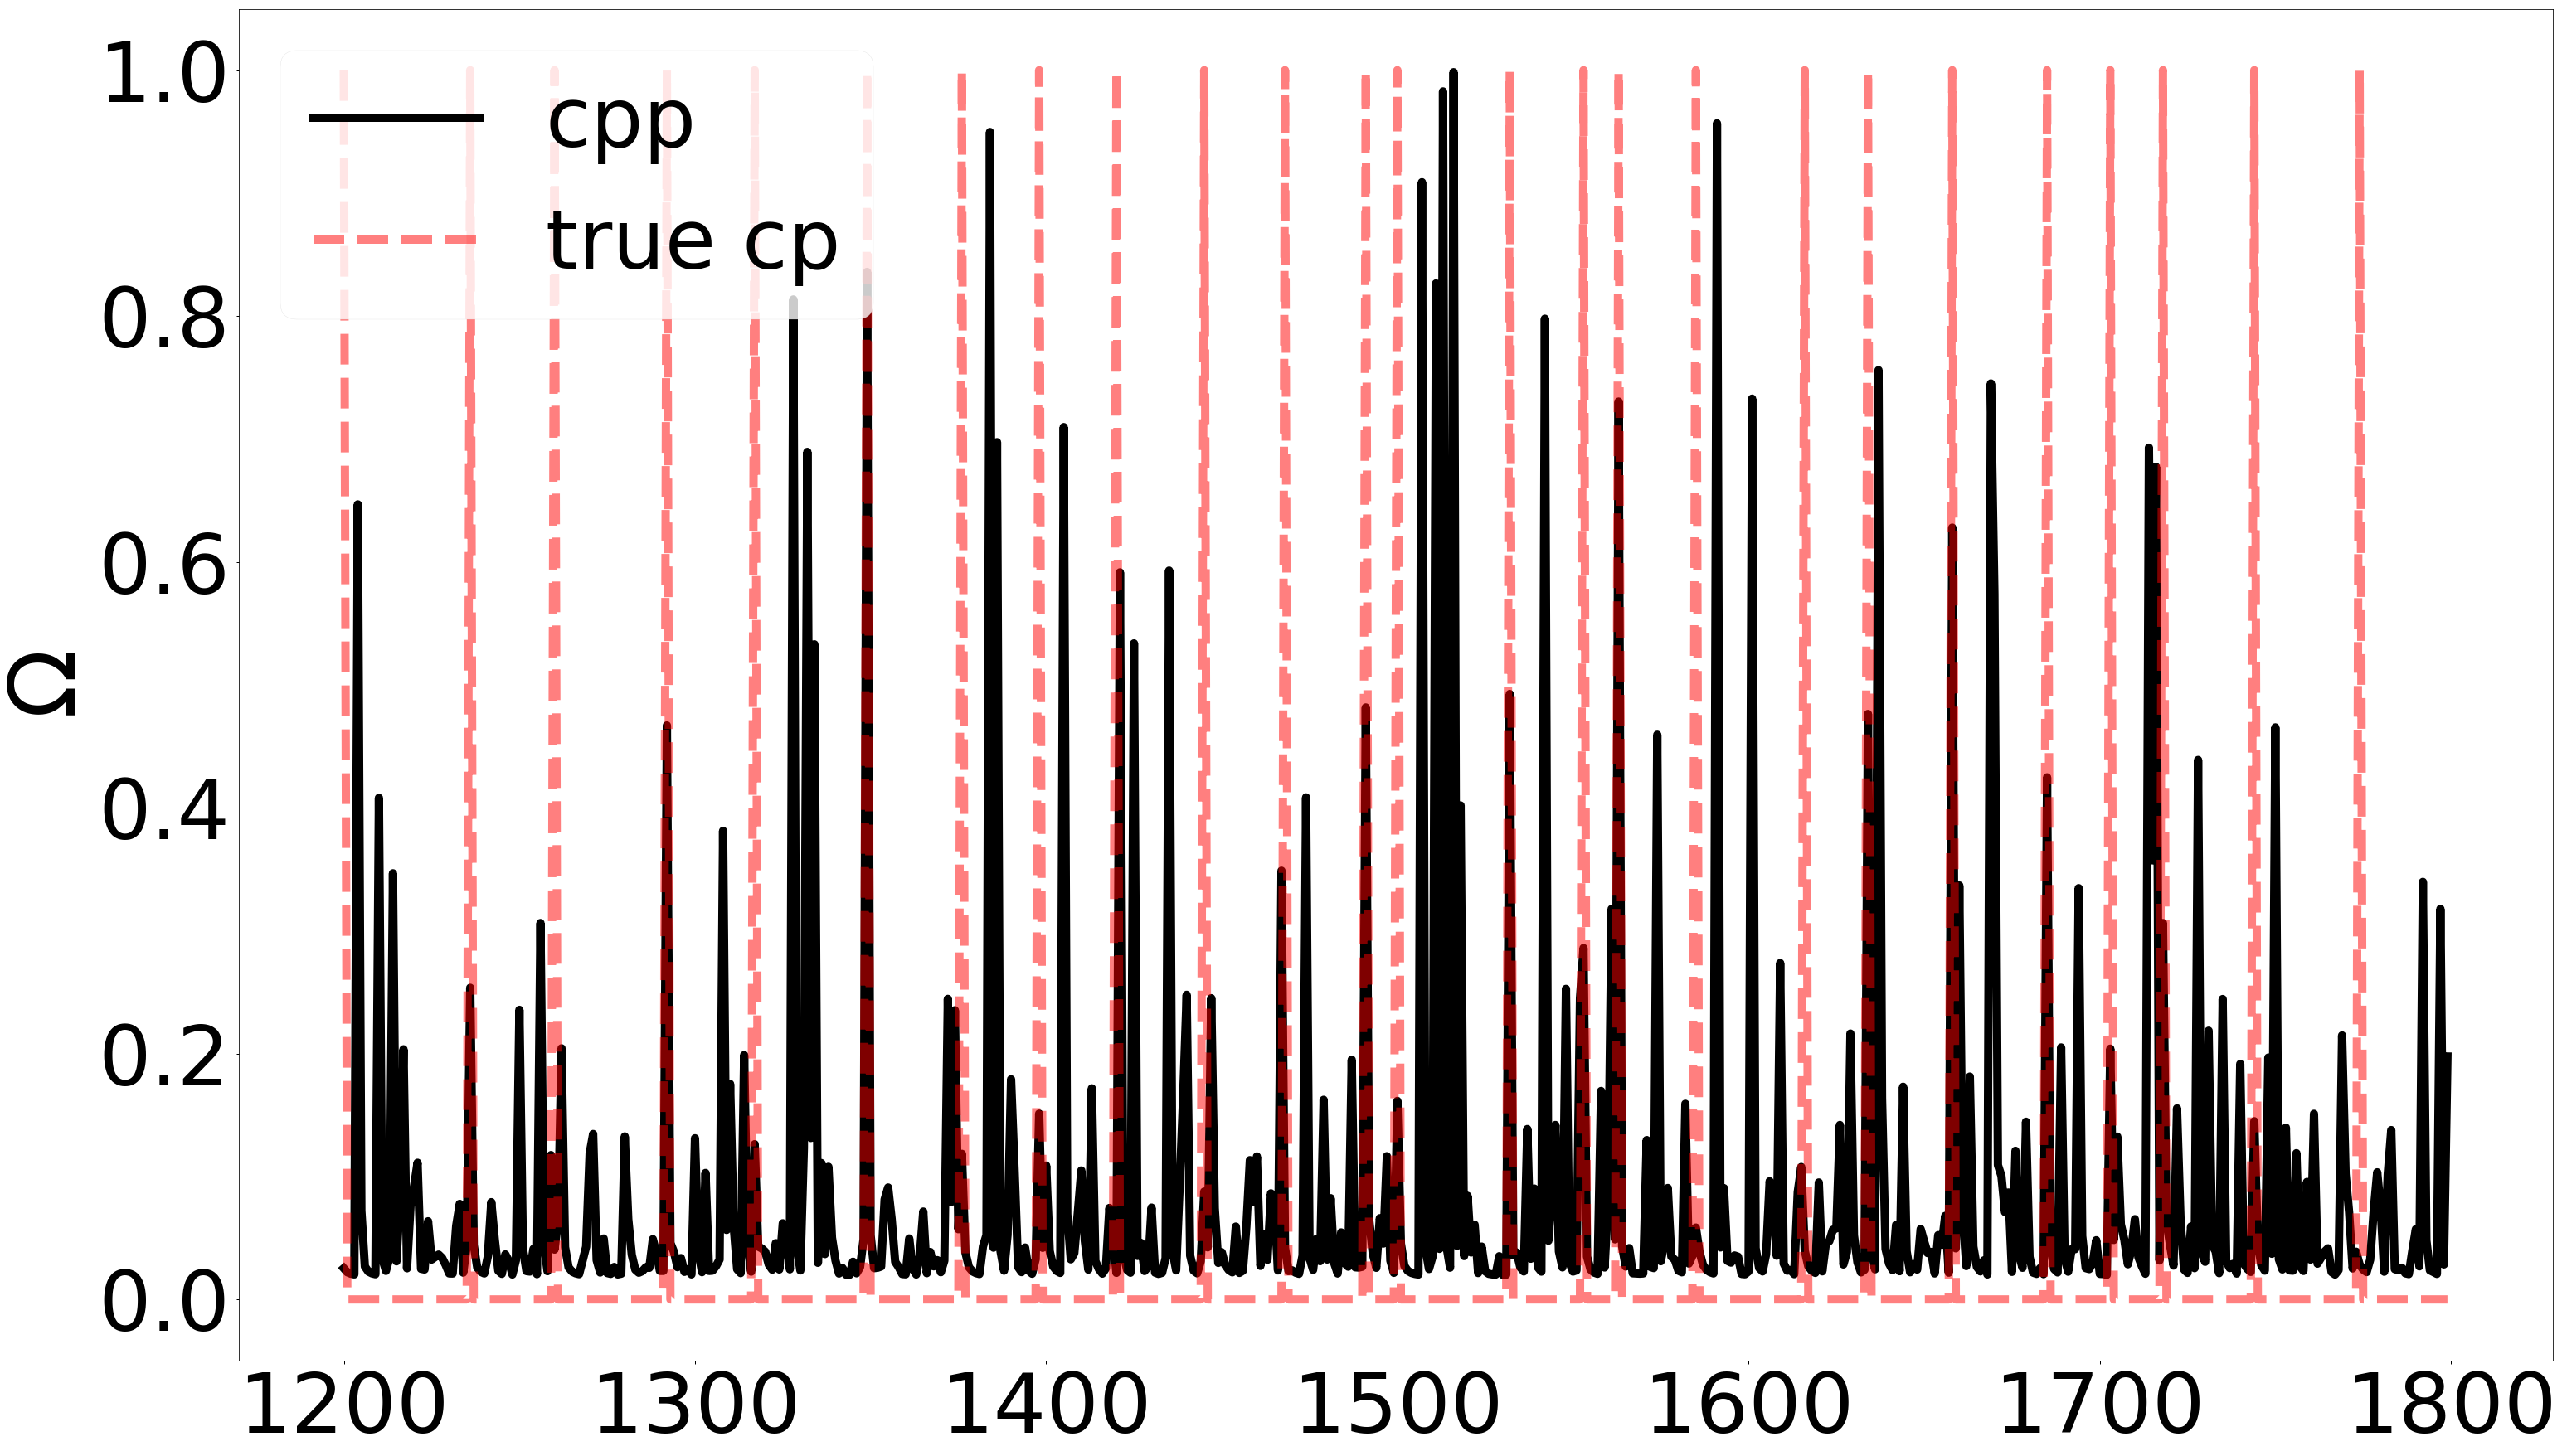

In [13]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data_sample_lc.cpp[0:600], 'k', label='cpp')
plt.plot(all_obs_data_sample_lc.cp[0:600], 'r--', alpha=0.5, label='true cp')
plt.ylabel('$\Omega$')
plt.legend(frameon=1,loc='upper left')

In [17]:
#use target choice as response 
#include correct target choice as stimulus 
all_obs_data = all_obs_data.rename(index=str, columns={"id_choice": "response", 
                                                       "p_id_solution": "stimulus",
                                                        "ID": "subj_idx"})
all_obs_data = all_obs_data[['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'target_B', 'cpp']] 
# #use target-based belief in reward difference (b_t0 - b_t1)
all_obs_data = all_obs_data.rename(index=str, columns={'target_B': 'B'})
# all_obs_data = all_obs_data[(all_obs_data.rt<0.6)]
# all_obs_data.reset_index(drop=True, inplace=True)

In [18]:
all_obs_data['condition'] = all_obs_data['condition'].str.strip()
all_obs_data.head()

,response,stimulus,rt,condition,subj_idx,B,cpp
0,0,0,0.711570,hc,761,0.000000,0.099471
1,1,0,0.681410,hc,761,0.000000,0.035079
2,0,0,0.767118,hc,761,-1.241007,0.023075
3,1,0,0.507209,hc,761,-0.595781,0.019881
4,0,0,0.656259,hc,761,-0.306135,0.018539


In [19]:
np.unique(all_obs_data.subj_idx), np.unique(all_obs_data.condition)

(array([761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773,
        774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784]),
 array(['hc', 'hv', 'lc', 'lv'], dtype=object))

In [18]:
#these are no longer error flipped but stimulus flipped 
# all_obs_data = hddm.utils.flip_errors(all_obs_data)

In [19]:
# plt.rcParams['figure.figsize'] = 30, 10
# sns.set(font_scale=5)
# fig = plt.figure()
# ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
# for i, subj_data in all_obs_data.groupby('subj_idx'):
#     subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [20]:
all_obs_data.columns

Index(['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'B', 'cpp'], dtype='object')

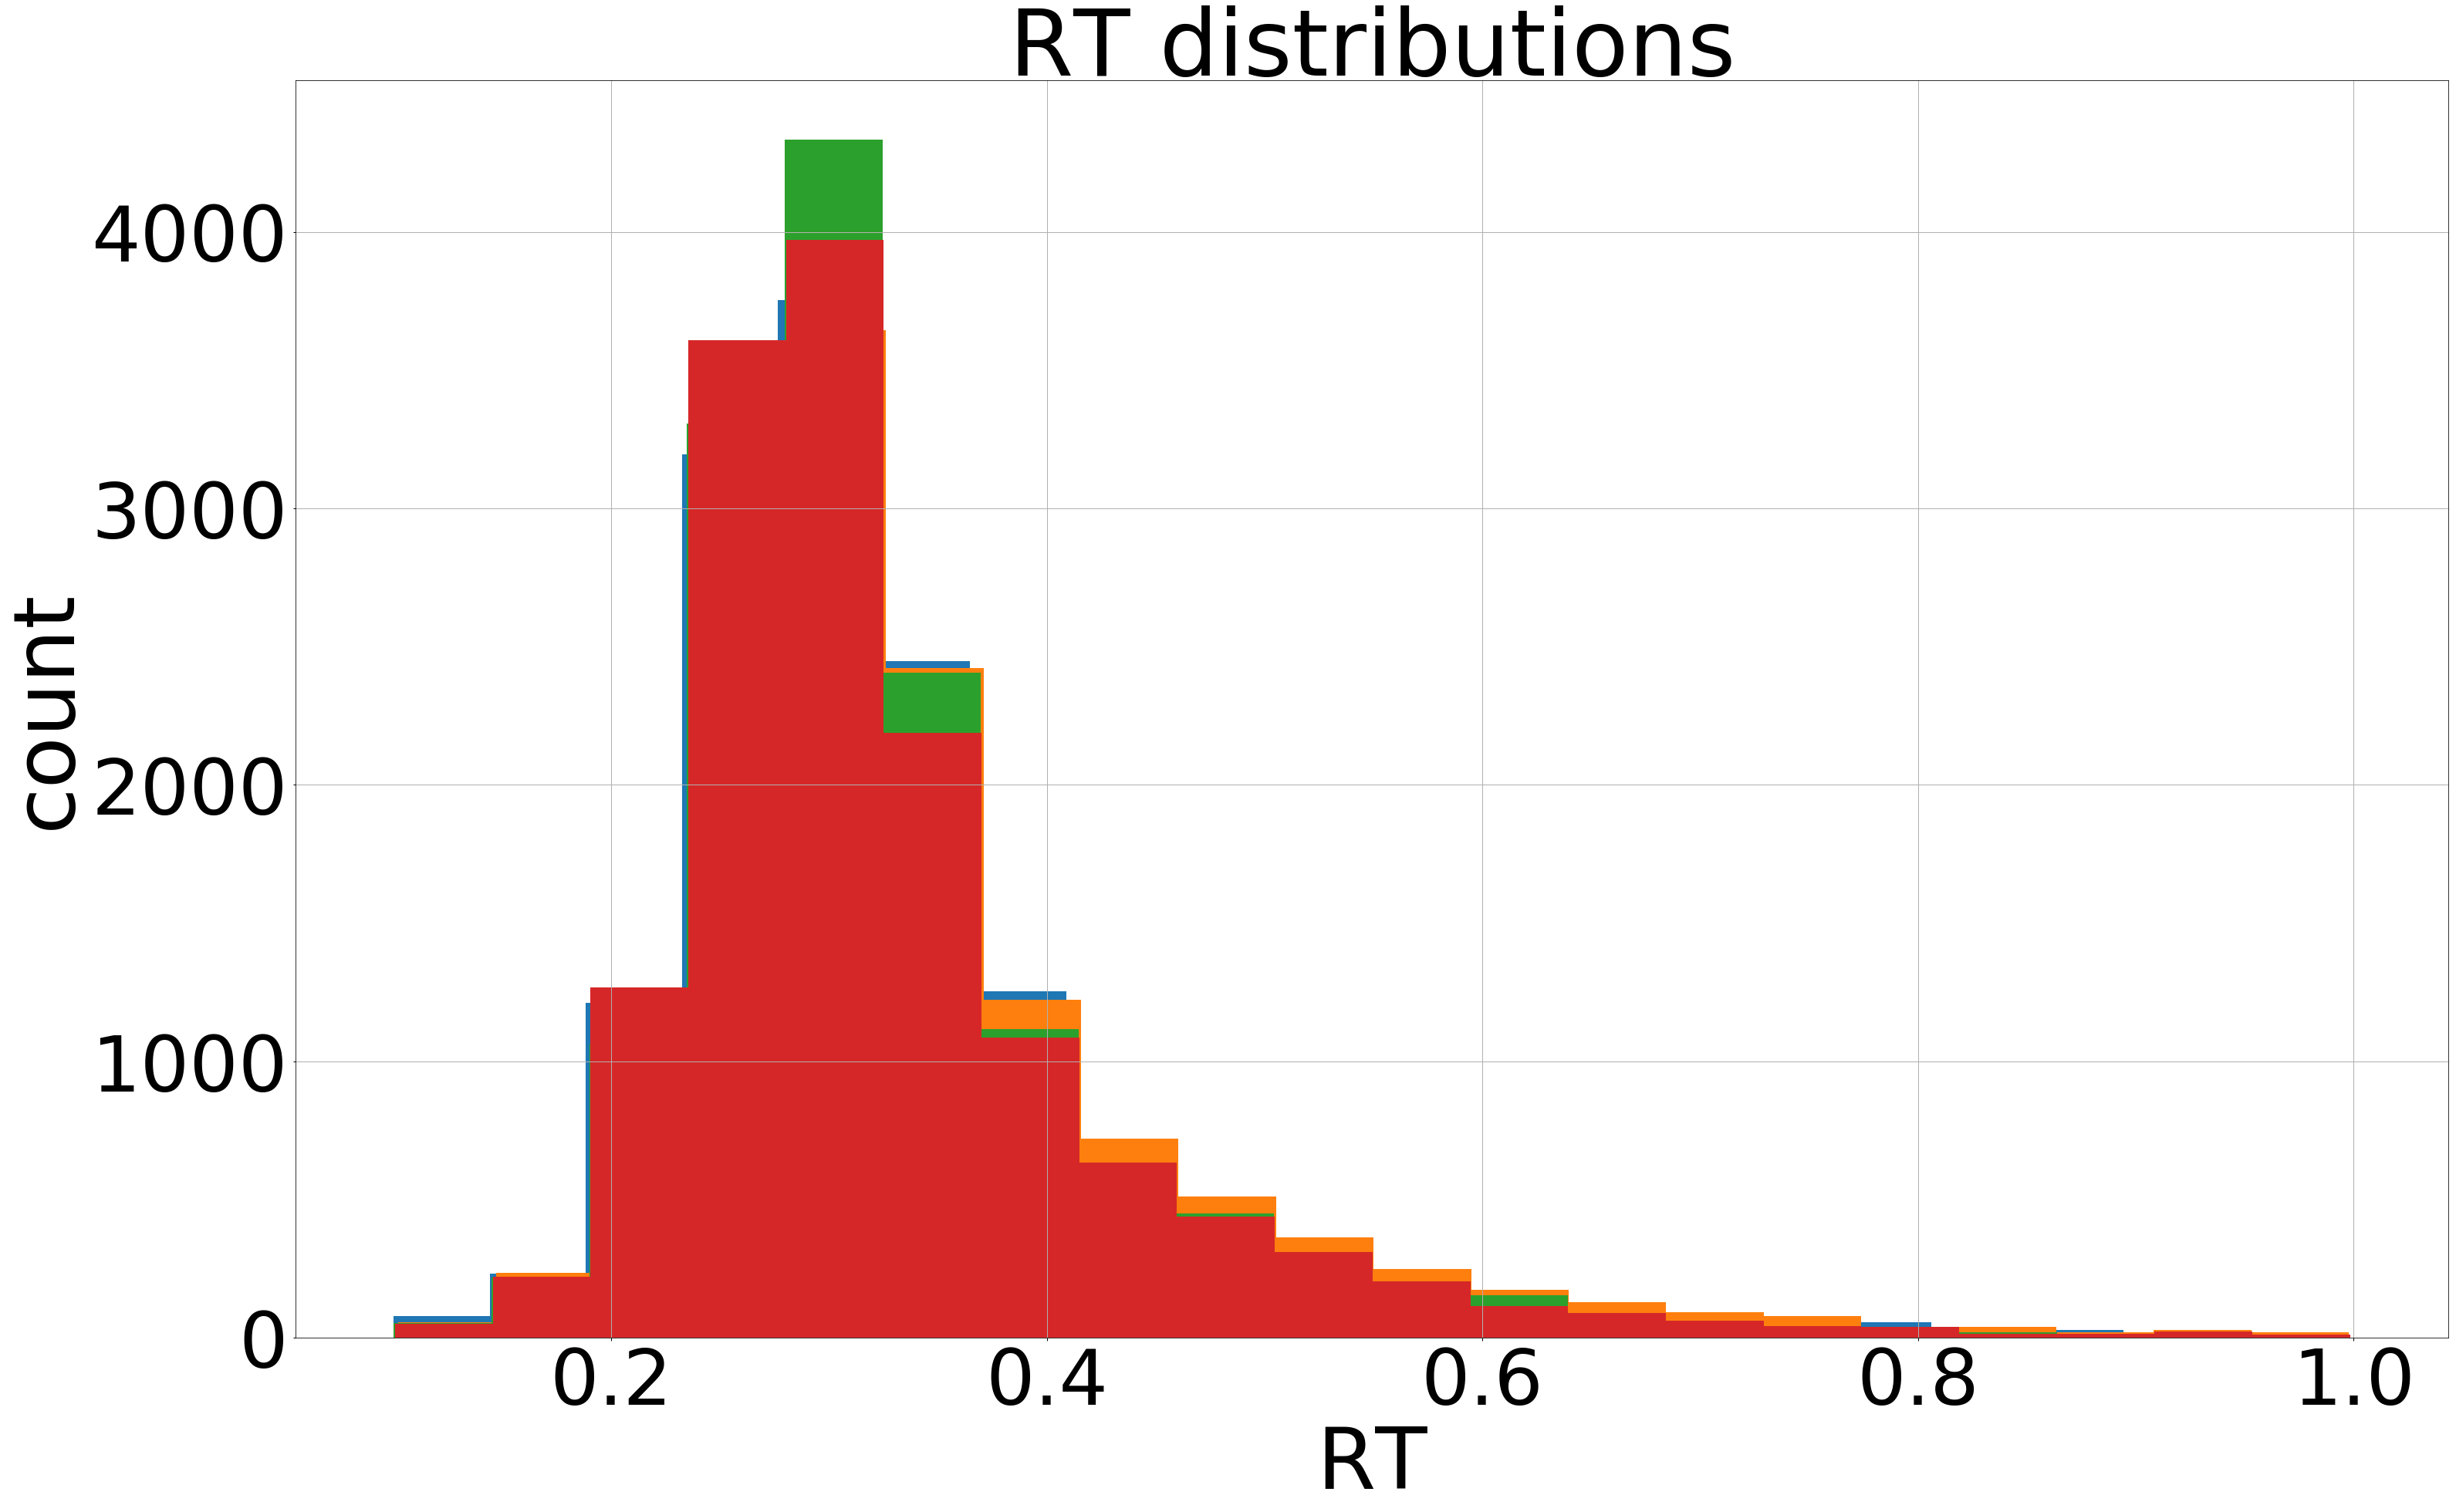

In [20]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_obs_data.groupby('condition'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

Text(0,0.5,'B')

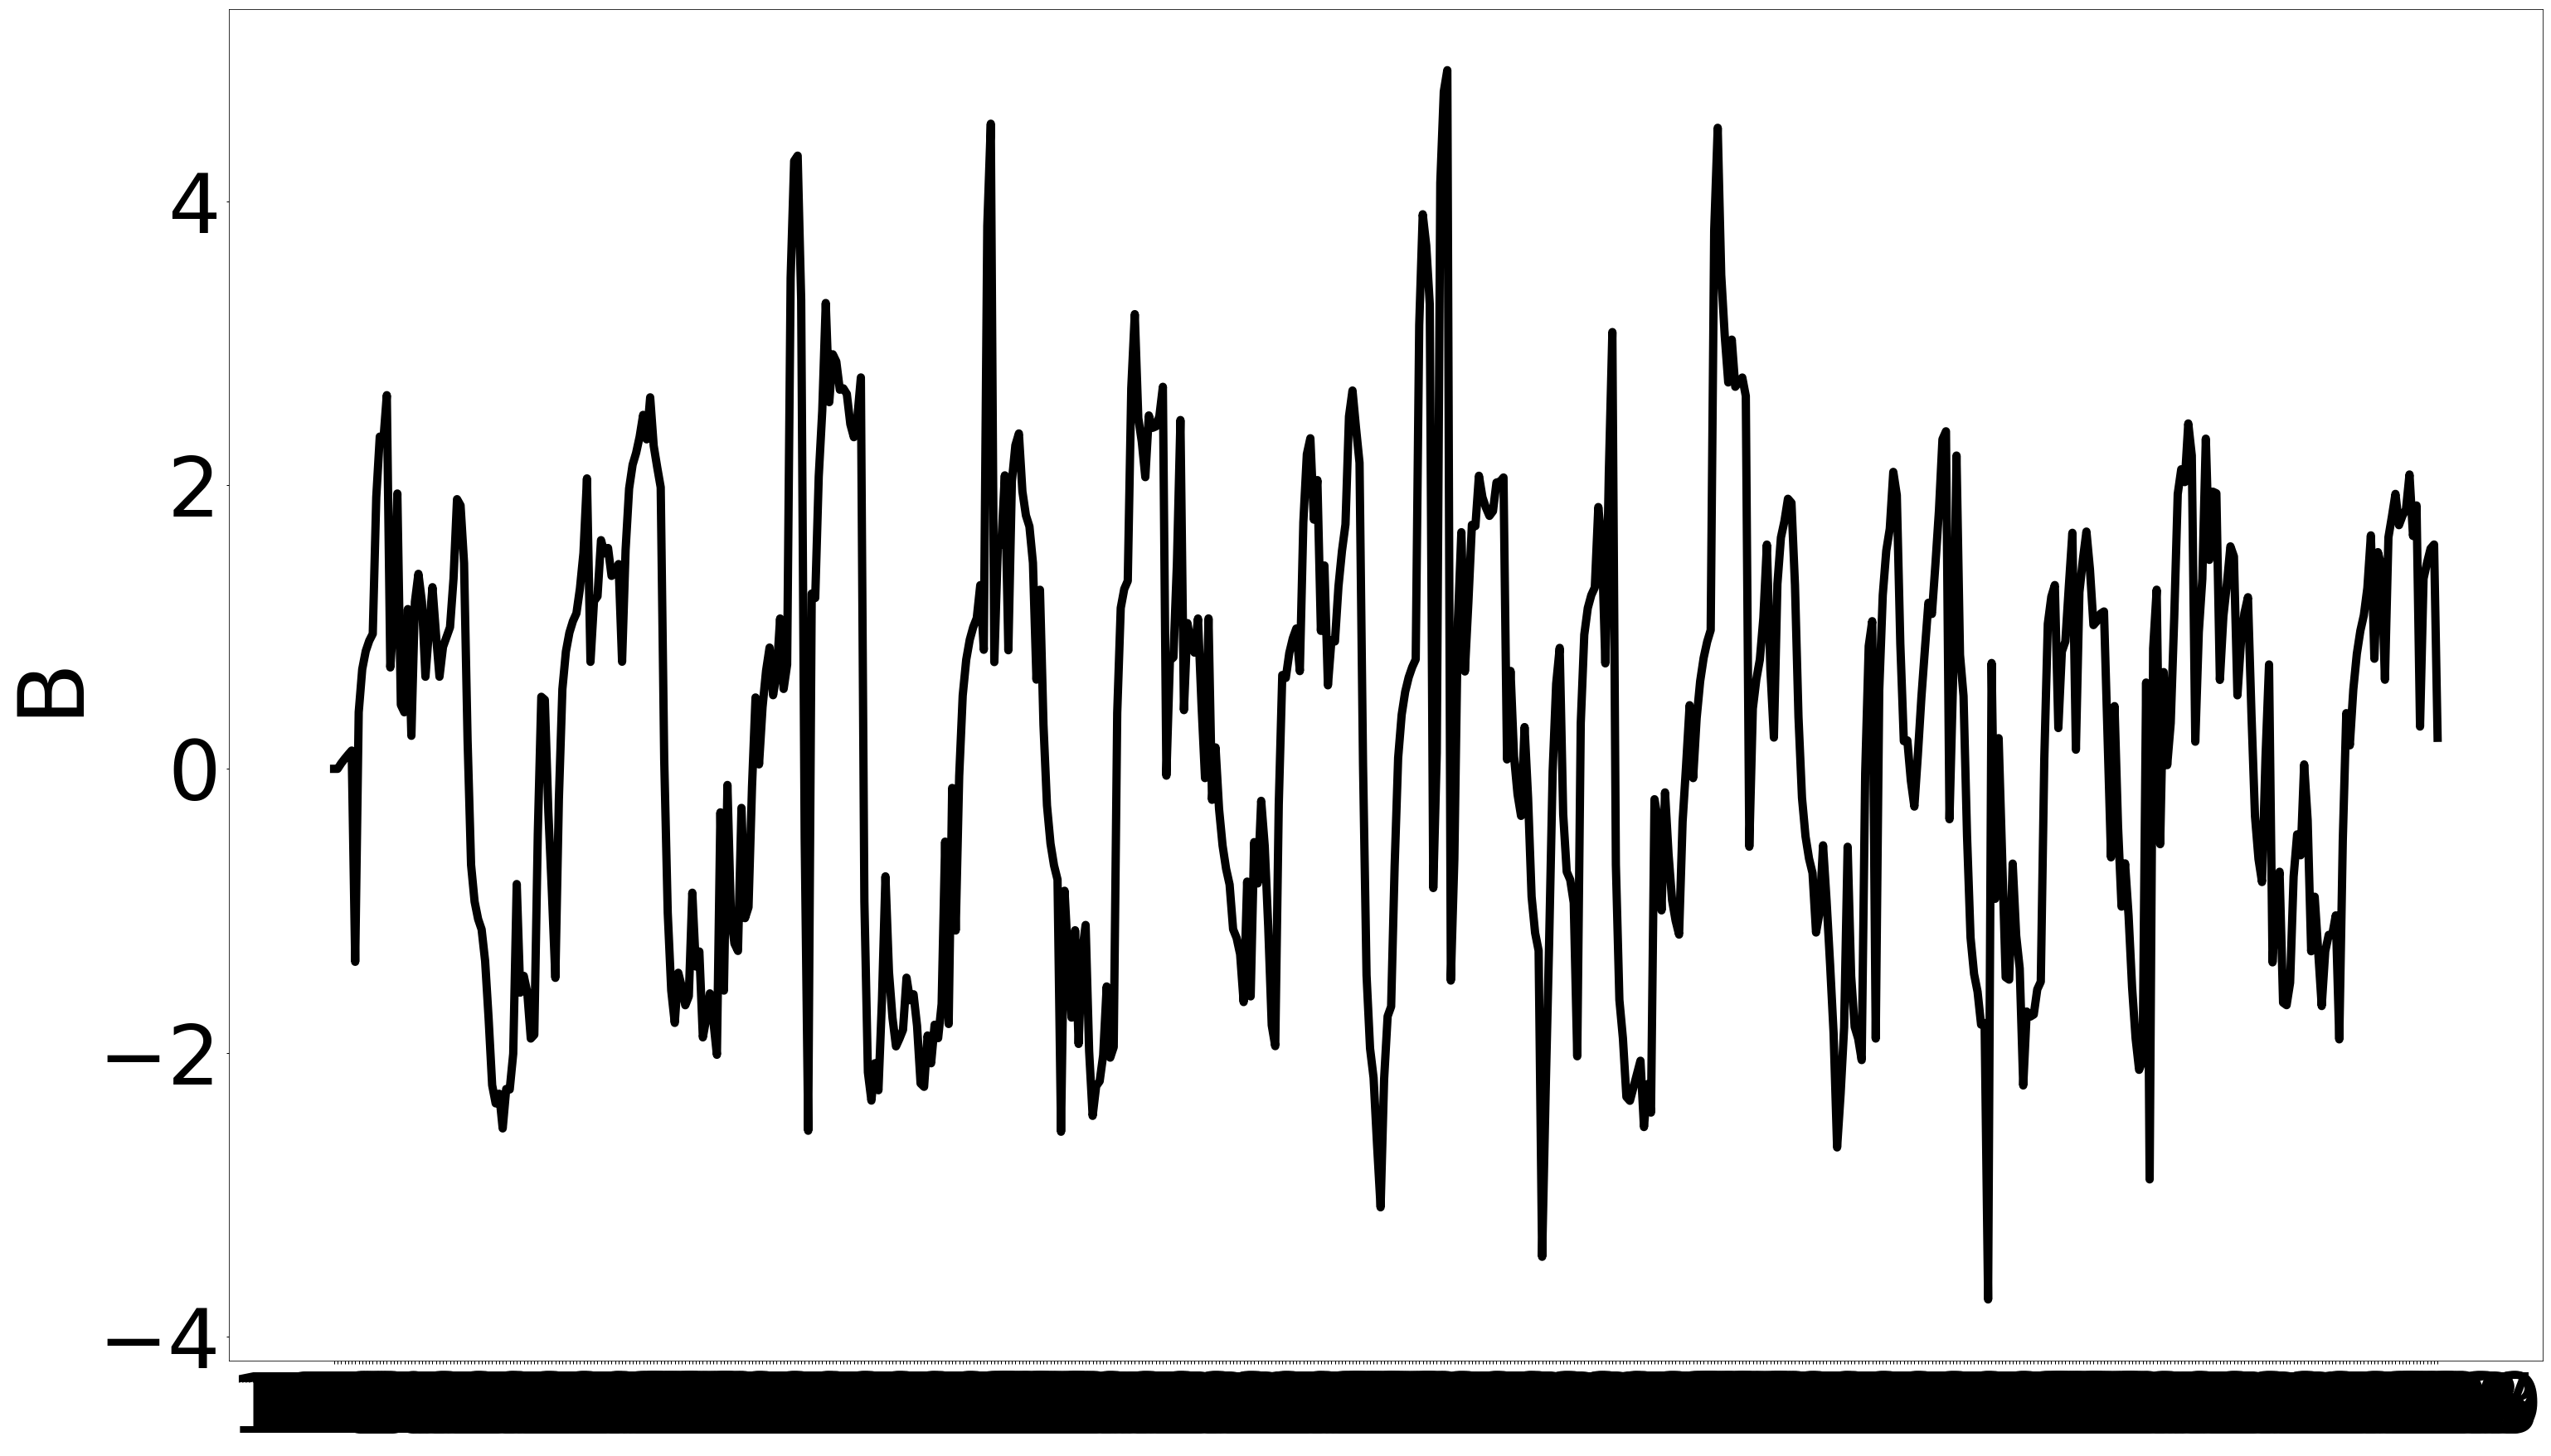

In [21]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data.B[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('B')

Text(0,0.5,'stimulus selected')

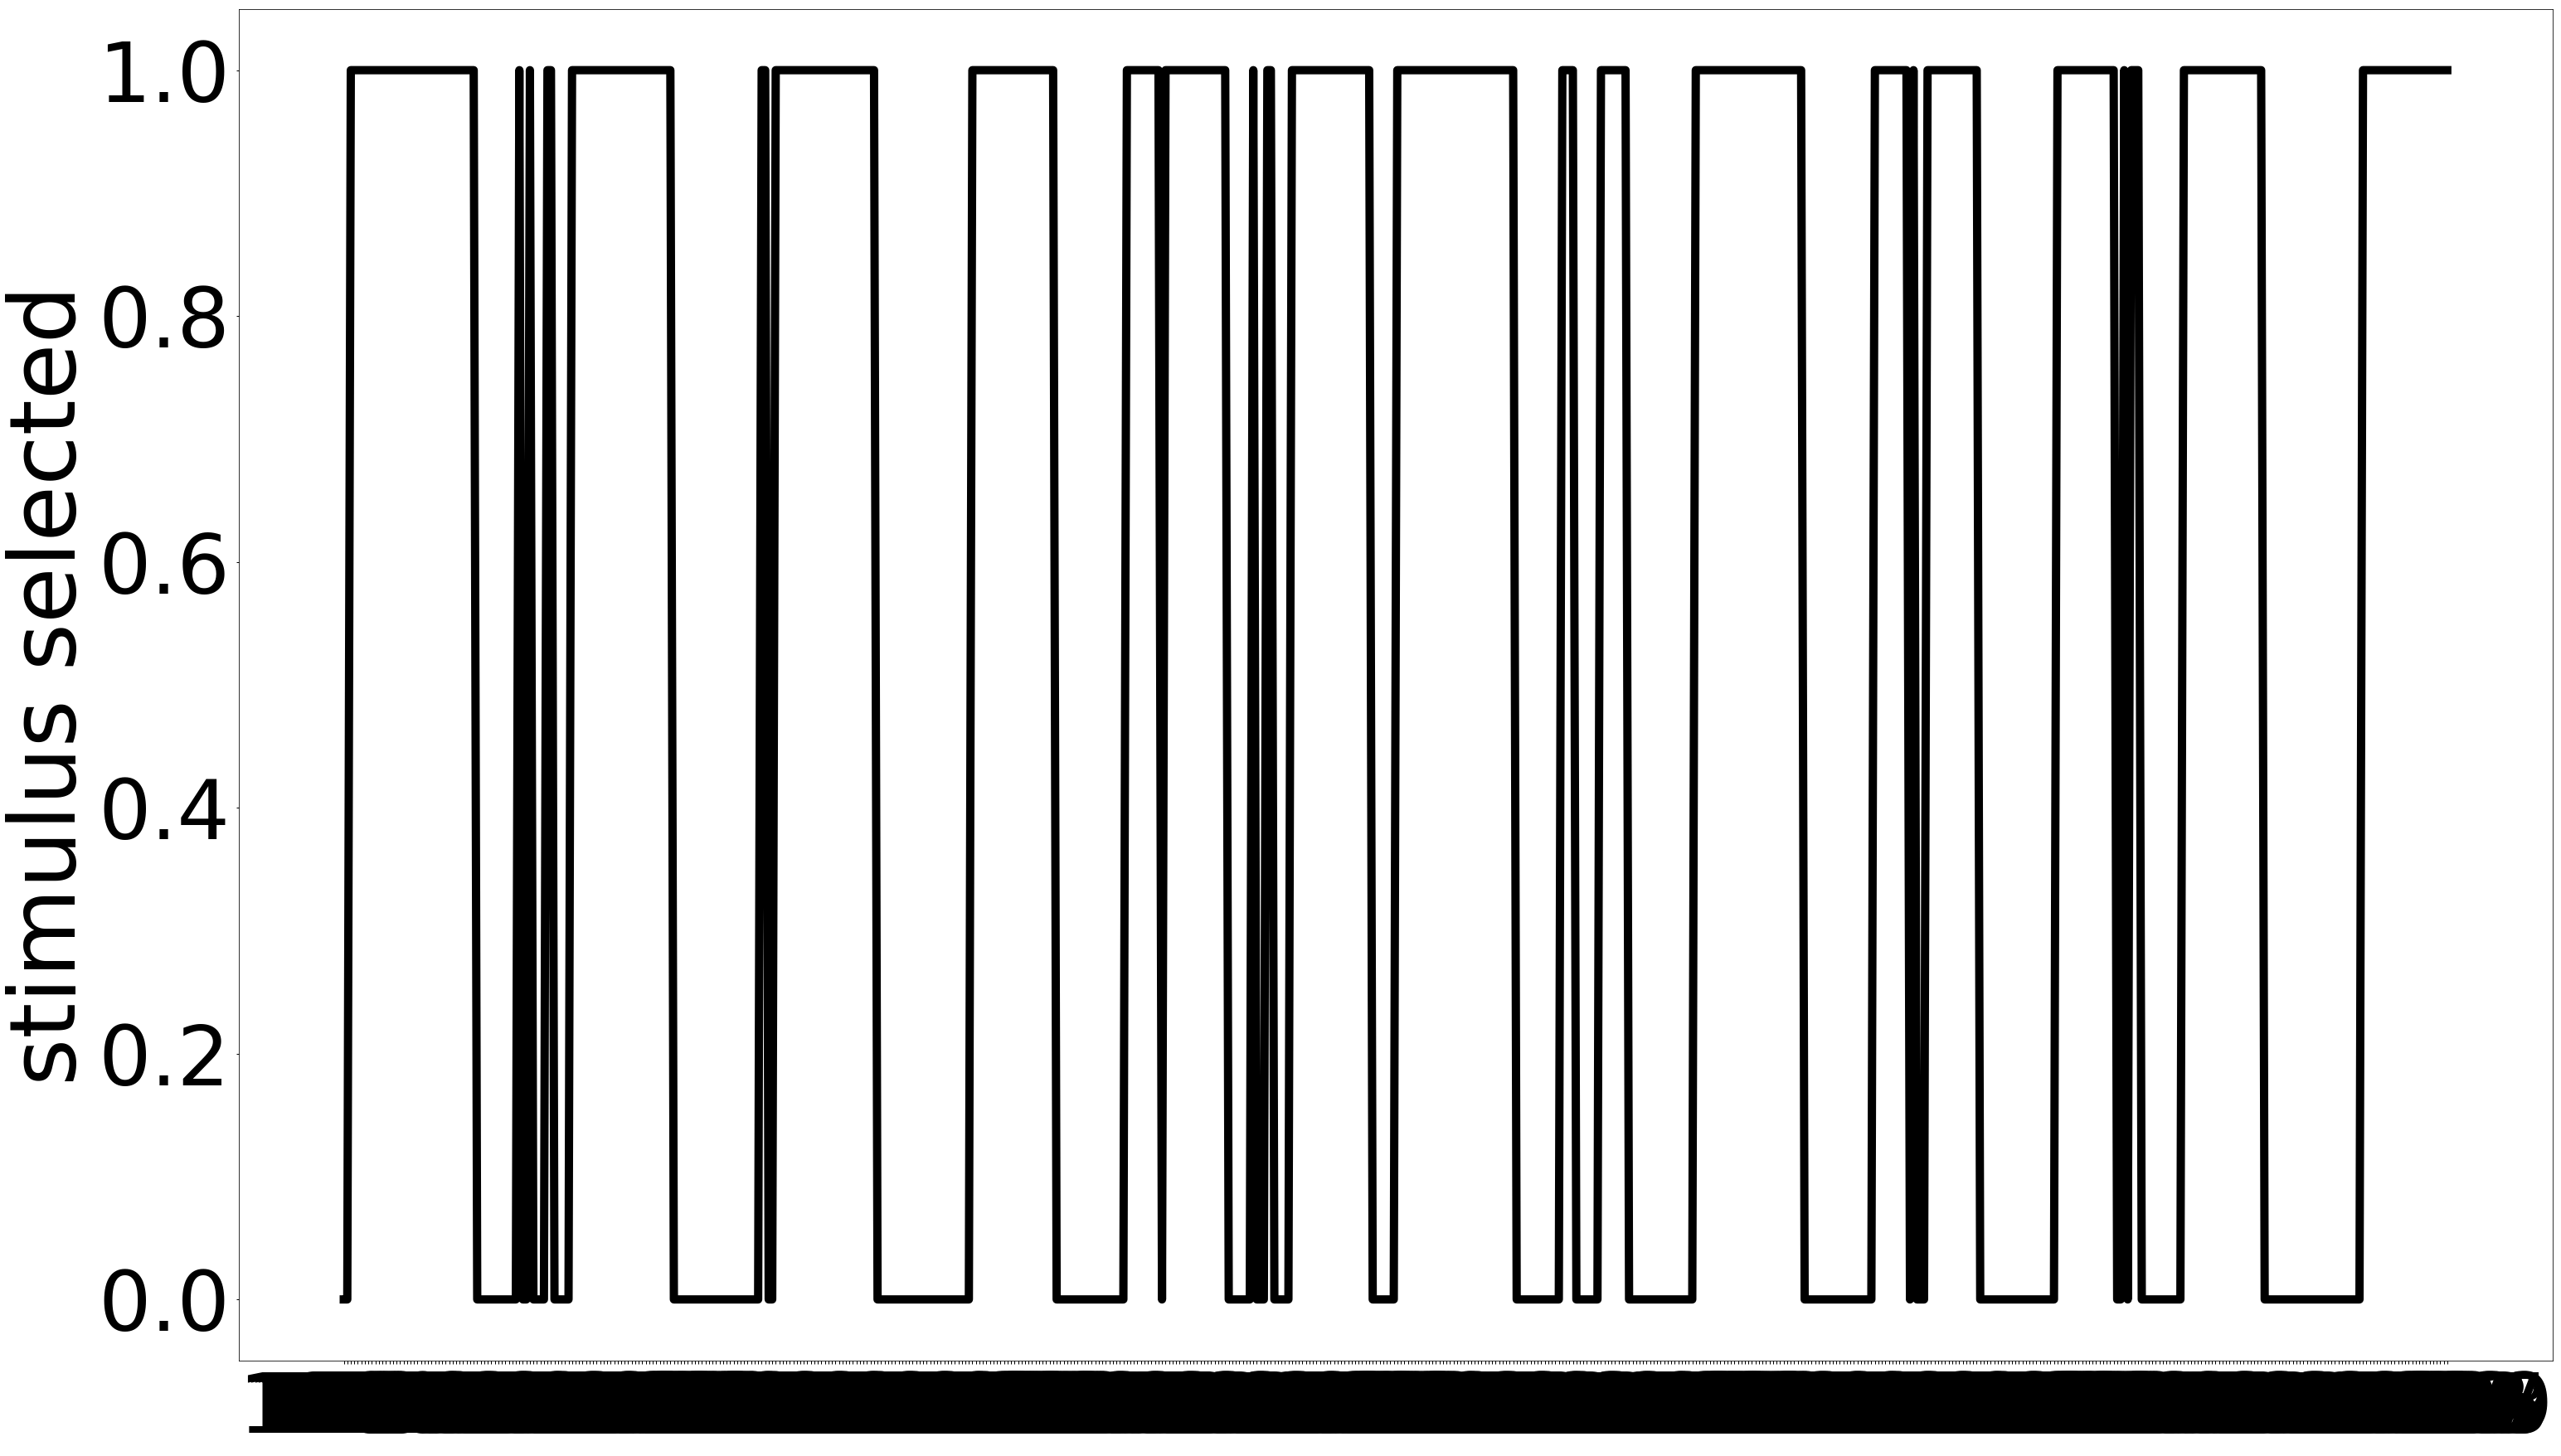

In [22]:
plt.figure(figsize=(50,30))
plt.plot(all_obs_data.response[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('stimulus selected')

In [23]:
all_obs_data.columns

Index(['response', 'stimulus', 'rt', 'condition', 'subj_idx', 'B', 'cpp'], dtype='object')

Text(0,0.5,'obs. rt')

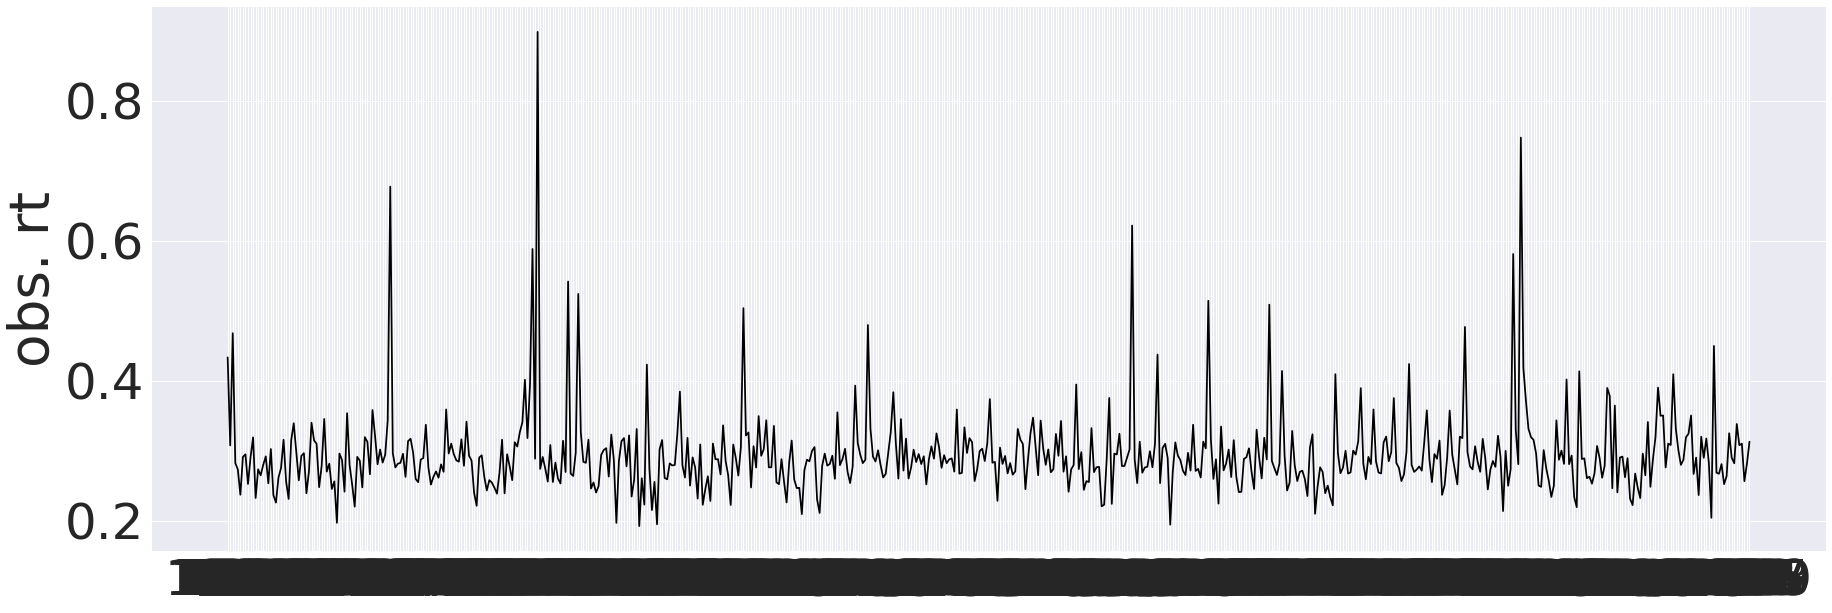

In [24]:
plt.rcParams['figure.figsize'] = 30, 10
sns.set(font_scale=5)
fig = plt.figure()
plt.plot(all_obs_data.rt[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('obs. rt')

Text(0,0.5,'correct stimulus')

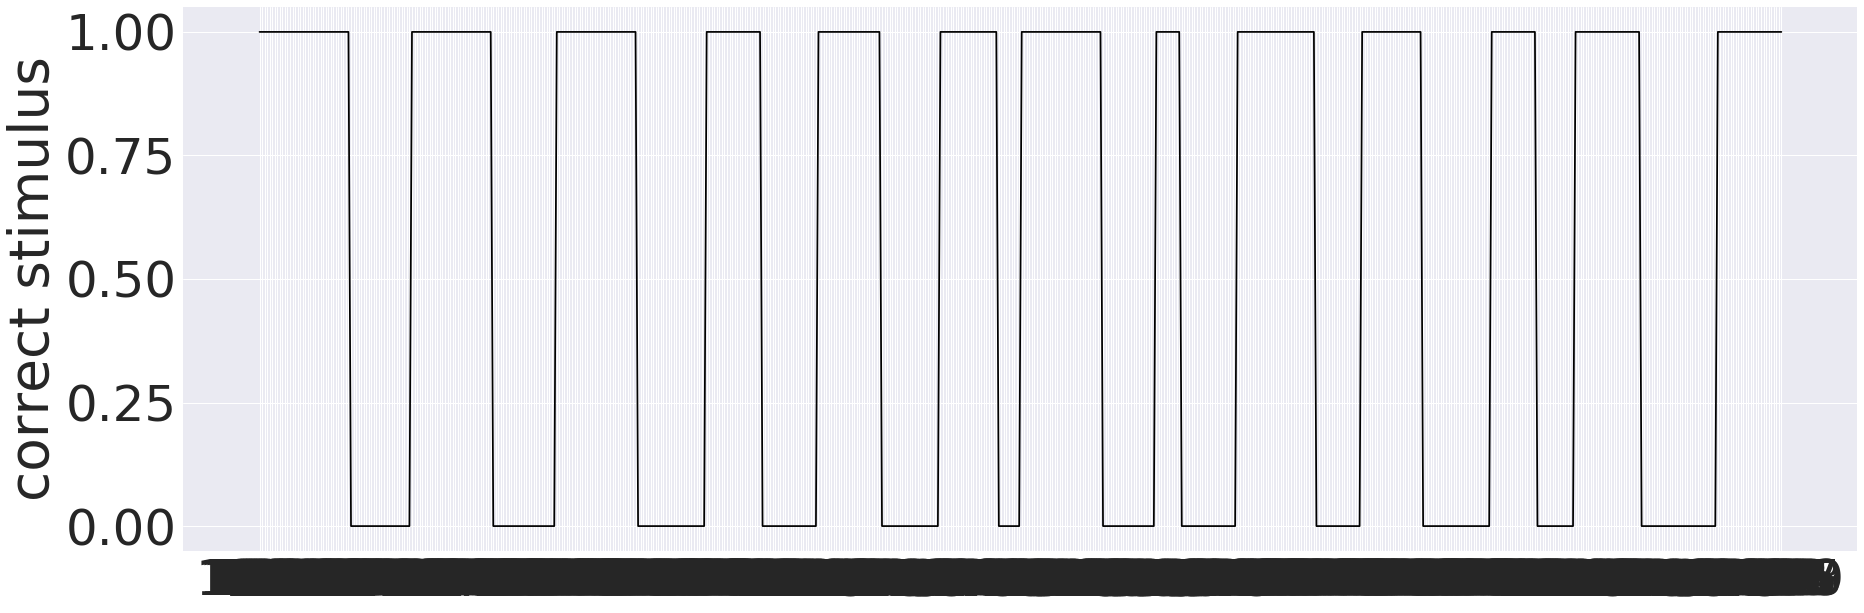

In [25]:
plt.plot(all_obs_data.stimulus[(all_obs_data.subj_idx == 761) & (all_obs_data.condition == 'lc')], 'k')
plt.ylabel('correct stimulus')

In [26]:
n_samples, n_burned_samples, n_thin = 100, 50, 5

In [65]:
def z_link_func(x, data=all_obs_data):
    stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
    return 1 / (1 + np.exp(-(x * stim)))

def v_link_func(x, data=all_obs_data):
    stim = (np.asarray(dmatrix('0 + C(s,[[1],[-1]])', {'s':data.stimulus.ix[x.index]})))
    return x * stim

In [28]:
#get all permutations of a,t,v
#hold position of learning signals constant to get all combinations 
#of learning signal and parameter pairs 
from itertools import permutations
from more_itertools import chunked

targets = ['a~', 't~', 'v~', 'z~']
signals = (('cpp:C(condition)', 'B:C(condition)'),)
param_pairs = list(permutations(targets, 2))
learning_signal_pairs = signals*(int(len(param_pairs)/len(signals)))

print(learning_signal_pairs)
print(param_pairs)

(('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'), ('cpp:C(condition)', 'B:C(condition)'))
[('a~', 't~'), ('a~', 'v~'), ('a~', 'z~'), ('t~', 'a~'), ('t~', 'v~'), ('t~', 'z~'), ('v~', 'a~'), ('v~', 't~'), ('v~', 'z~'), ('z~', 'a~'), ('z~', 't~'), ('z~', 'v~')]


In [29]:
tuple_idx = np.repeat(list(np.arange(len(learning_signal_pairs))),2)
tuple_element_idx = [0,1]*len(learning_signal_pairs)
models = [param_pairs[t_idx][e_idx] + learning_signal_pairs[t_idx][e_idx] for t_idx,e_idx in zip(tuple_idx, tuple_element_idx)]

In [30]:
reg_descriptions = list(chunked(models,2))
print(reg_descriptions)

model_dict = {'a_cpp_t_B': reg_descriptions[0], 'a_cpp_v_B': reg_descriptions[1],
'a_cpp_z_B': reg_descriptions[2], 't_cpp_a_B': reg_descriptions[3], 
't_cpp_v_B': reg_descriptions[4], 't_cpp_z_B': reg_descriptions[5], 
              'v_cpp_a_B': reg_descriptions[6], 'v_cpp_t_B': reg_descriptions[7],
             'v_cpp_z_B': reg_descriptions[8], 'z_cpp_a_B': reg_descriptions[9],
             'z_cpp_t_B': reg_descriptions[10], 'z_cpp_v_B': reg_descriptions[11]}

[['a~cpp:C(condition)', 't~B:C(condition)'], ['a~cpp:C(condition)', 'v~B:C(condition)'], ['a~cpp:C(condition)', 'z~B:C(condition)'], ['t~cpp:C(condition)', 'a~B:C(condition)'], ['t~cpp:C(condition)', 'v~B:C(condition)'], ['t~cpp:C(condition)', 'z~B:C(condition)'], ['v~cpp:C(condition)', 'a~B:C(condition)'], ['v~cpp:C(condition)', 't~B:C(condition)'], ['v~cpp:C(condition)', 'z~B:C(condition)'], ['z~cpp:C(condition)', 'a~B:C(condition)'], ['z~cpp:C(condition)', 't~B:C(condition)'], ['z~cpp:C(condition)', 'v~B:C(condition)']]


In [60]:
a_z_stim_code = hddm.HDDMStimCoding(all_obs_data, 
                                        
                                        stim_col='stimulus', split_param='z', 
                                        depends_on={'z': ['condition'], 'a': ['condition']},
                                        p_outlier=0.05)
a_z_stim_code.find_starting_values()
a_z_stim_code.sample(1000,burn=200, dbname='a_z_stim_code.db', db='pickle')

Setting model to be non-informative
Adding z to includes.


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 528.4 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [58]:
a_v_stim_code = hddm.HDDMStimCoding(all_obs_data, 
                                        group_only_nodes=['v','a','t'], 
                                        stim_col='stimulus', split_param='v', 
                                        depends_on={'v': ['condition'], 'a': ['condition']},
                                        p_outlier=0.05)
a_v_stim_code.find_starting_values()
a_v_stim_code.sample(1000,burn=200, dbname='a_v_stim_code.db', db='pickle')

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 500.5 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

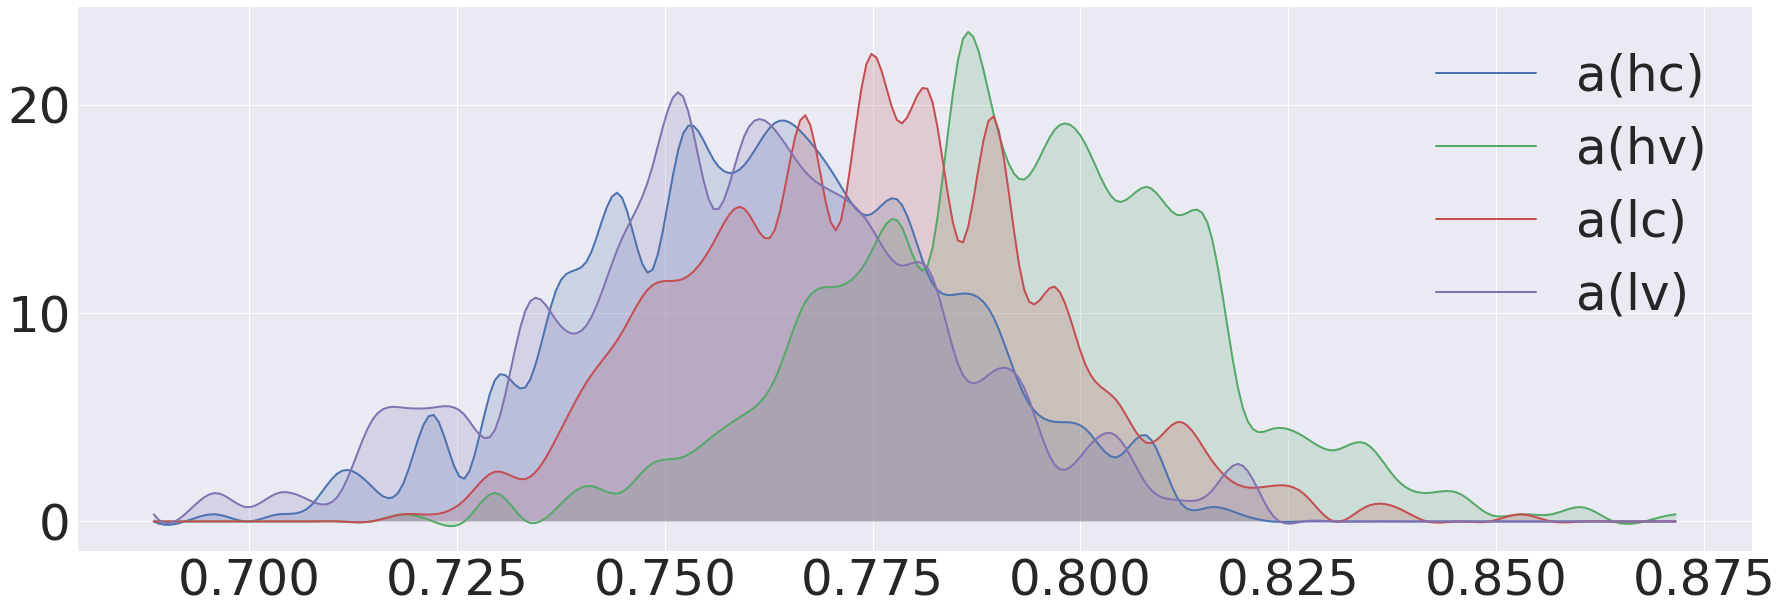

In [64]:
a_z_stim_code.plot_posteriors_conditions()

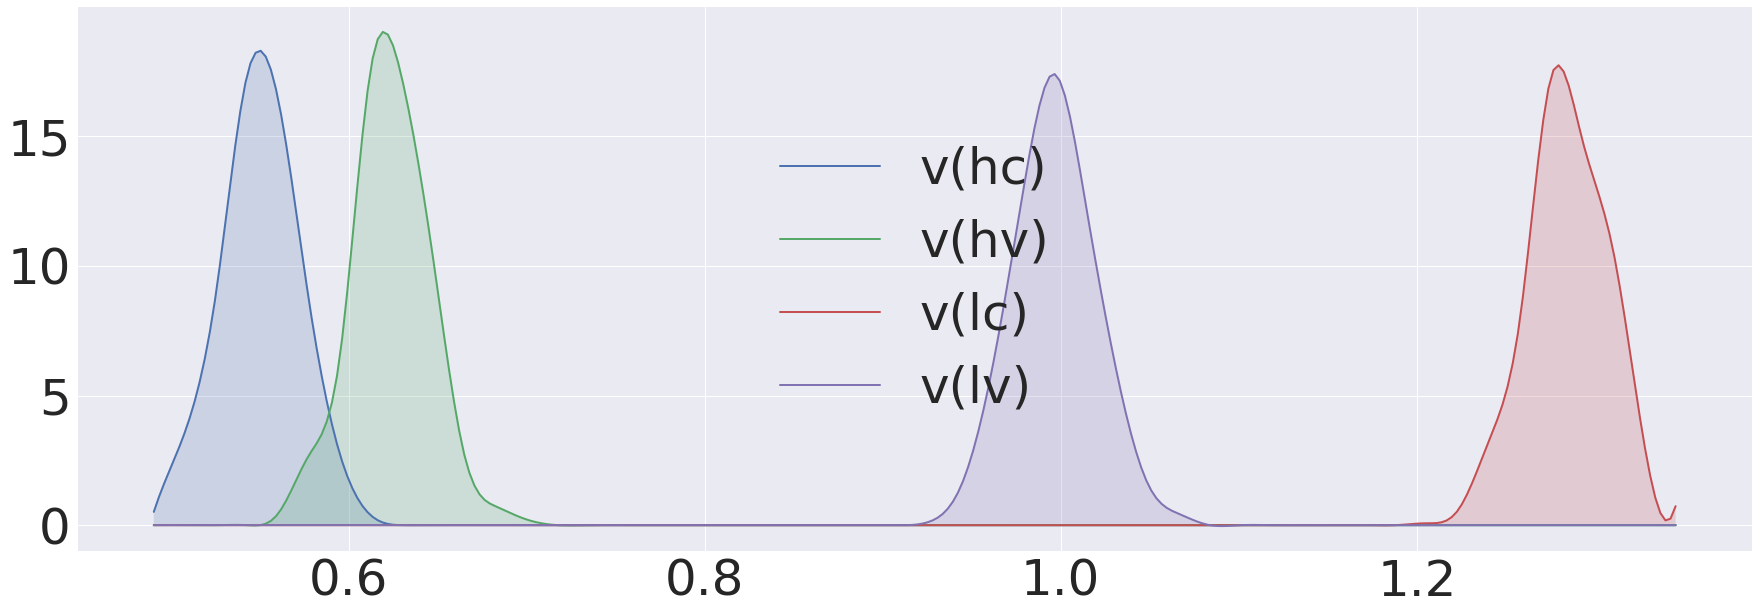

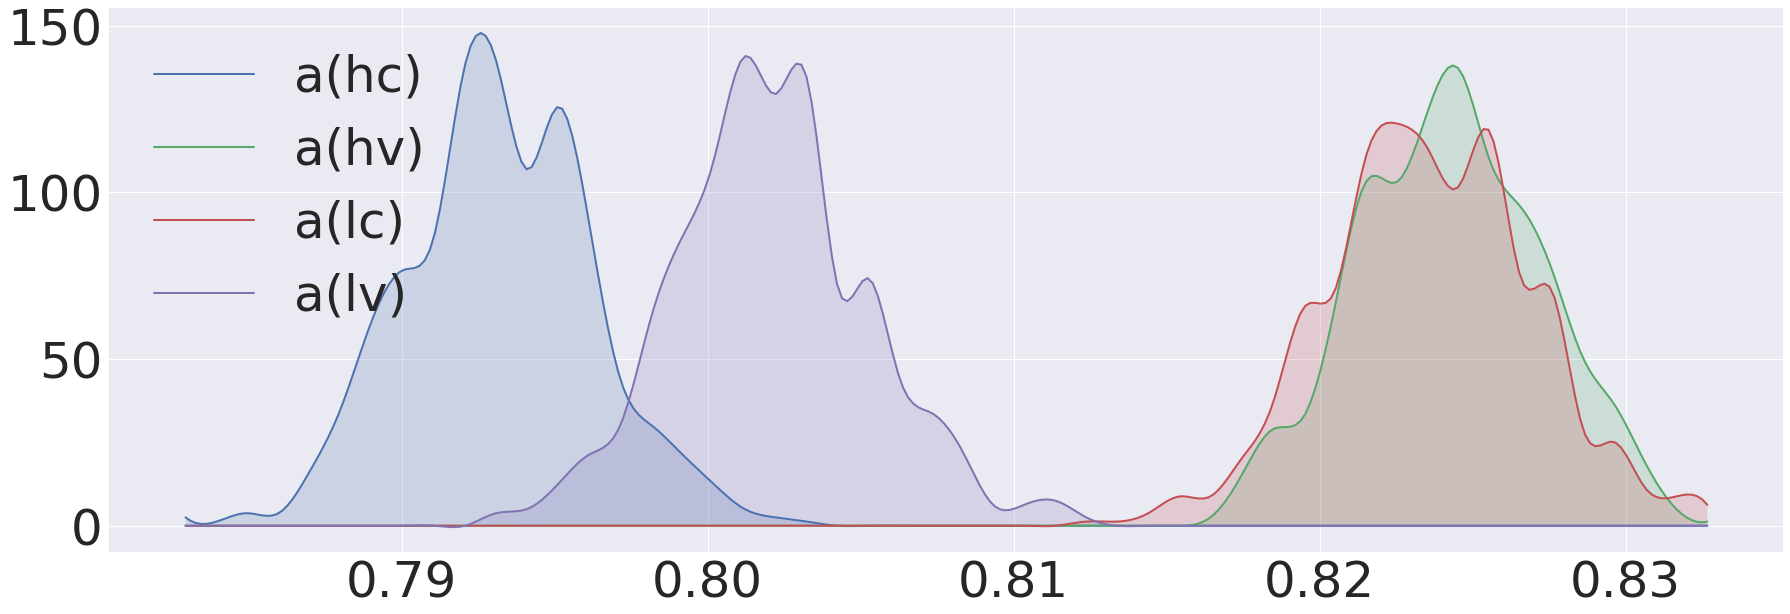

In [61]:
a_v_stim_code.plot_posteriors_conditions()

In [31]:
print(model_dict)

{'a_cpp_t_B': ['a~cpp:C(condition)', 't~B:C(condition)'], 't_cpp_z_B': ['t~cpp:C(condition)', 'z~B:C(condition)'], 'a_cpp_v_B': ['a~cpp:C(condition)', 'v~B:C(condition)'], 'v_cpp_t_B': ['v~cpp:C(condition)', 't~B:C(condition)'], 't_cpp_v_B': ['t~cpp:C(condition)', 'v~B:C(condition)'], 'z_cpp_t_B': ['z~cpp:C(condition)', 't~B:C(condition)'], 'z_cpp_v_B': ['z~cpp:C(condition)', 'v~B:C(condition)'], 'a_cpp_z_B': ['a~cpp:C(condition)', 'z~B:C(condition)'], 'v_cpp_z_B': ['v~cpp:C(condition)', 'z~B:C(condition)'], 'z_cpp_a_B': ['z~cpp:C(condition)', 'a~B:C(condition)'], 'v_cpp_a_B': ['v~cpp:C(condition)', 'a~B:C(condition)'], 't_cpp_a_B': ['t~cpp:C(condition)', 'a~B:C(condition)']}


In [32]:
a_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['a_cpp_t_B'], p_outlier=0.05 )
a_cpp_t_B_obs_reg.find_starting_values()
a_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='a_cpp_t_B_obs_reg_test_outlier.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(condition)[hc]', 't_B:C(condition)[hv]', 't_B:C(condition)[lc]', 't_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------101%-----------------] 101 of 100 complete in 571.3 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [41]:
a_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['a_cpp_v_B'], p_outlier=0.05 )
a_cpp_v_B_obs_reg.find_starting_values()
a_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='a_cpp_v_B_obs_reg_test.db', db='pickle')

Adding these covariates:
['a_Intercept', 'a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------101%-----------------] 101 of 100 complete in 514.4 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [36]:
t_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['t_cpp_a_B'],  )
t_cpp_a_B_obs_reg.find_starting_values()
t_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='t_cpp_a_B_obs_reg.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(condition)[hc]', 'a_B:C(condition)[hv]', 'a_B:C(condition)[lc]', 'a_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 2001 of 2000 complete in 11235.4 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [63]:
model_dict['t_cpp_v_B']

['t~cpp:C(condition)', 'v~B:C(condition)']

In [68]:
t_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data, [{'model': 't~cpp:C(condition)','link_func': lambda x:x}, {'model':'v~B:C(condition)'
                                                     , 'link_func': v_link_func}] )
t_cpp_v_B_obs_reg.find_starting_values()
t_cpp_v_B_obs_reg.sample(200,burn=100, dbname='t_cpp_v_B_obs_reg_test.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 201 of 200 complete in 2191.2 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [38]:
v_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['v_cpp_a_B'],  )
v_cpp_a_B_obs_reg.find_starting_values()
v_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='v_cpp_a_B_obs_reg.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp:C(condition)[hc]', 'v_cpp:C(condition)[hv]', 'v_cpp:C(condition)[lc]', 'v_cpp:C(condition)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(condition)[hc]', 'a_B:C(condition)[hv]', 'a_B:C(condition)[lc]', 'a_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 2001 of 2000 complete in 12467.1 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [39]:
v_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data,model_dict['v_cpp_t_B'],  )
v_cpp_t_B_obs_reg.find_starting_values()
v_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='v_cpp_t_B_obs_reg.db', db='pickle')

Adding these covariates:
['v_Intercept', 'v_cpp:C(condition)[hc]', 'v_cpp:C(condition)[hv]', 'v_cpp:C(condition)[lc]', 'v_cpp:C(condition)[lv]']
Adding these covariates:
['t_Intercept', 't_B:C(condition)[hc]', 't_B:C(condition)[hv]', 't_B:C(condition)[lc]', 't_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 2001 of 2000 complete in 13249.9 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

# All $z$ models 

In [134]:
z_cpp_a_B_obs_reg = hddm.HDDMRegressor(all_obs_data, [{'model': 'z~cpp:C(condition)','link_func': z_link_func}, {'model':'a~B:C(condition)'
                                                     , 'link_func': lambda x:x}], bias=True)
z_cpp_a_B_obs_reg.find_starting_values()
z_cpp_a_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='z_cpp_a_B_obs_reg.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp:C(condition)[hc]', 'z_cpp:C(condition)[hv]', 'z_cpp:C(condition)[lc]', 'z_cpp:C(condition)[lv]']
Adding these covariates:
['a_Intercept', 'a_B:C(condition)[hc]', 'a_B:C(condition)[hv]', 'a_B:C(condition)[lc]', 'a_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 12401.9 sec

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/ana

In [ ]:
z_cpp_v_B_obs_reg = hddm.HDDMRegressor(all_obs_data,[{'model': 'z~cpp:C(condition)','link_func': z_link_func}, {'model':'v~B:C(condition)'
                                                     , 'link_func': lambda x:x}], bias=True)
z_cpp_v_B_obs_reg.find_starting_values()
z_cpp_v_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='z_cpp_v_B_obs_reg.db', db='pickle')

Adding these covariates:
['z_Intercept', 'z_cpp:C(condition)[hc]', 'z_cpp:C(condition)[hv]', 'z_cpp:C(condition)[lc]', 'z_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1927: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/scipy/optimize/optimize.py:1928: RuntimeWarning: invalid value encountered in double_scalars
  p = (x - v) * tmp2 - (x - w) * tmp1
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-------          20%                  ] 206 of 1000 complete in 2629.0 sec

In [ ]:
z_cpp_t_B_obs_reg = hddm.HDDMRegressor(all_obs_data, [{'model': 'z~cpp:C(condition)','link_func': z_link_func}, {'model':'t~B:C(condition)'
                                                     , 'link_func': lambda x:x}], bias=True)
z_cpp_t_B_obs_reg.find_starting_values()
z_cpp_t_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='z_cpp_t_B_obs_reg.db', db='pickle')

In [ ]:
a_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data,
                                       [{'model': 'a~cpp:C(condition)','link_func': lambda x:x}, {'model':'z~B:C(condition)'
                                                     , 'link_func': z_link_func }], bias=True)
a_cpp_z_B_obs_reg.find_starting_values()
a_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='a_cpp_z_B_obs_reg.db', db='pickle')

In [ ]:
v_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data,
                                      [{'model': 'v~cpp:C(condition)','link_func': lambda x:x}, {'model':'z~B:C(condition)'
                                                     , 'link_func': z_link_func }], bias=True)
v_cpp_z_B_obs_reg.find_starting_values()
v_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='v_cpp_z_B_obs_reg.db', db='pickle')

In [ ]:
t_cpp_z_B_obs_reg = hddm.HDDMRegressor(all_obs_data,
                                                     [{'model': 't~cpp:C(condition)','link_func': lambda: x:x}, {'model':'z~B:C(condition)'
                                                     , 'link_func': z_link_func}], bias=True)
t_cpp_z_B_obs_reg.find_starting_values()
t_cpp_z_B_obs_reg.sample(n_samples,burn=n_burned_samples, dbname='t_cpp_z_B_obs_reg.db', db='pickle')

# Save models 

In [46]:
#save models... many many samples, much time
a_cpp_t_B_obs_reg.save(write_dir+'a_cpp_t_B_obs_reg')
a_cpp_v_B_obs_reg.save(write_dir+'a_cpp_v_B_obs_reg')
t_cpp_a_B_obs_reg.save(write_dir+'t_cpp_a_B_obs_reg')

t_cpp_v_B_obs_reg.save(write_dir+'t_cpp_v_B_obs_reg')
v_cpp_a_B_obs_reg.save(write_dir+'v_cpp_a_B_obs_reg')
v_cpp_t_B_obs_reg.save(write_dir+'v_cpp_t_B_obs_reg')

#save z models 
z_cpp_a_B_obs_reg.save(write_dir+'z_cpp_a_B_obs_reg')
z_cpp_v_B_obs_reg.save(write_dir+'z_cpp_v_B_obs_reg')
z_cpp_t_B_obs_reg.save(write_dir+'z_cpp_t_B_obs_reg')

a_cpp_z_B_obs_reg.save(write_dir+'a_cpp_z_B_obs_reg')
v_cpp_z_B_obs_reg.save(write_dir+'v_cpp_z_B_obs_reg')
t_cpp_z_B_obs_reg.save(write_dir+'t_cpp_z_B_obs_reg')

# Plot model fits

In [47]:
dics = [a_cpp_t_B_obs_reg.dic, a_cpp_v_B_obs_reg.dic,t_cpp_a_B_obs_reg.dic,
        t_cpp_v_B_obs_reg.dic, v_cpp_a_B_obs_reg.dic, v_cpp_t_B_obs_reg.dic, 
       z_cpp_a_B_obs_reg.dic, z_cpp_v_B_obs_reg.dic, z_cpp_t_B_obs_reg.dic, 
        a_cpp_z_B_obs_reg.dic, v_cpp_z_B_obs_reg.dic,t_cpp_z_B_obs_reg.dic]
m_names = ['a_cpp & t_B', 'a_cpp & v_B', 't_cpp & a_B', 
            't_cpp & v_B', 'v_cpp & a_B', 'v_cpp & t_B', 
              'z_cpp & a_B', 'z_cpp & v_B', 'z_cpp & t_B',
              'a_cpp & z_B', 'v_cpp & z_B', 't_cpp & z_B']

In [89]:
a_cpp_v_B_obs_reg

In [54]:
winner = np.where(dics == min(dics))[0]
m_names[winner]

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: converting an array with ndim > 0 to an index will result in an error in the future
  


't_cpp & v_B'

Text(0.5,1,'Stimulus coding sanity check: all pairwise combinations of parameters and learning signals+ generative model')

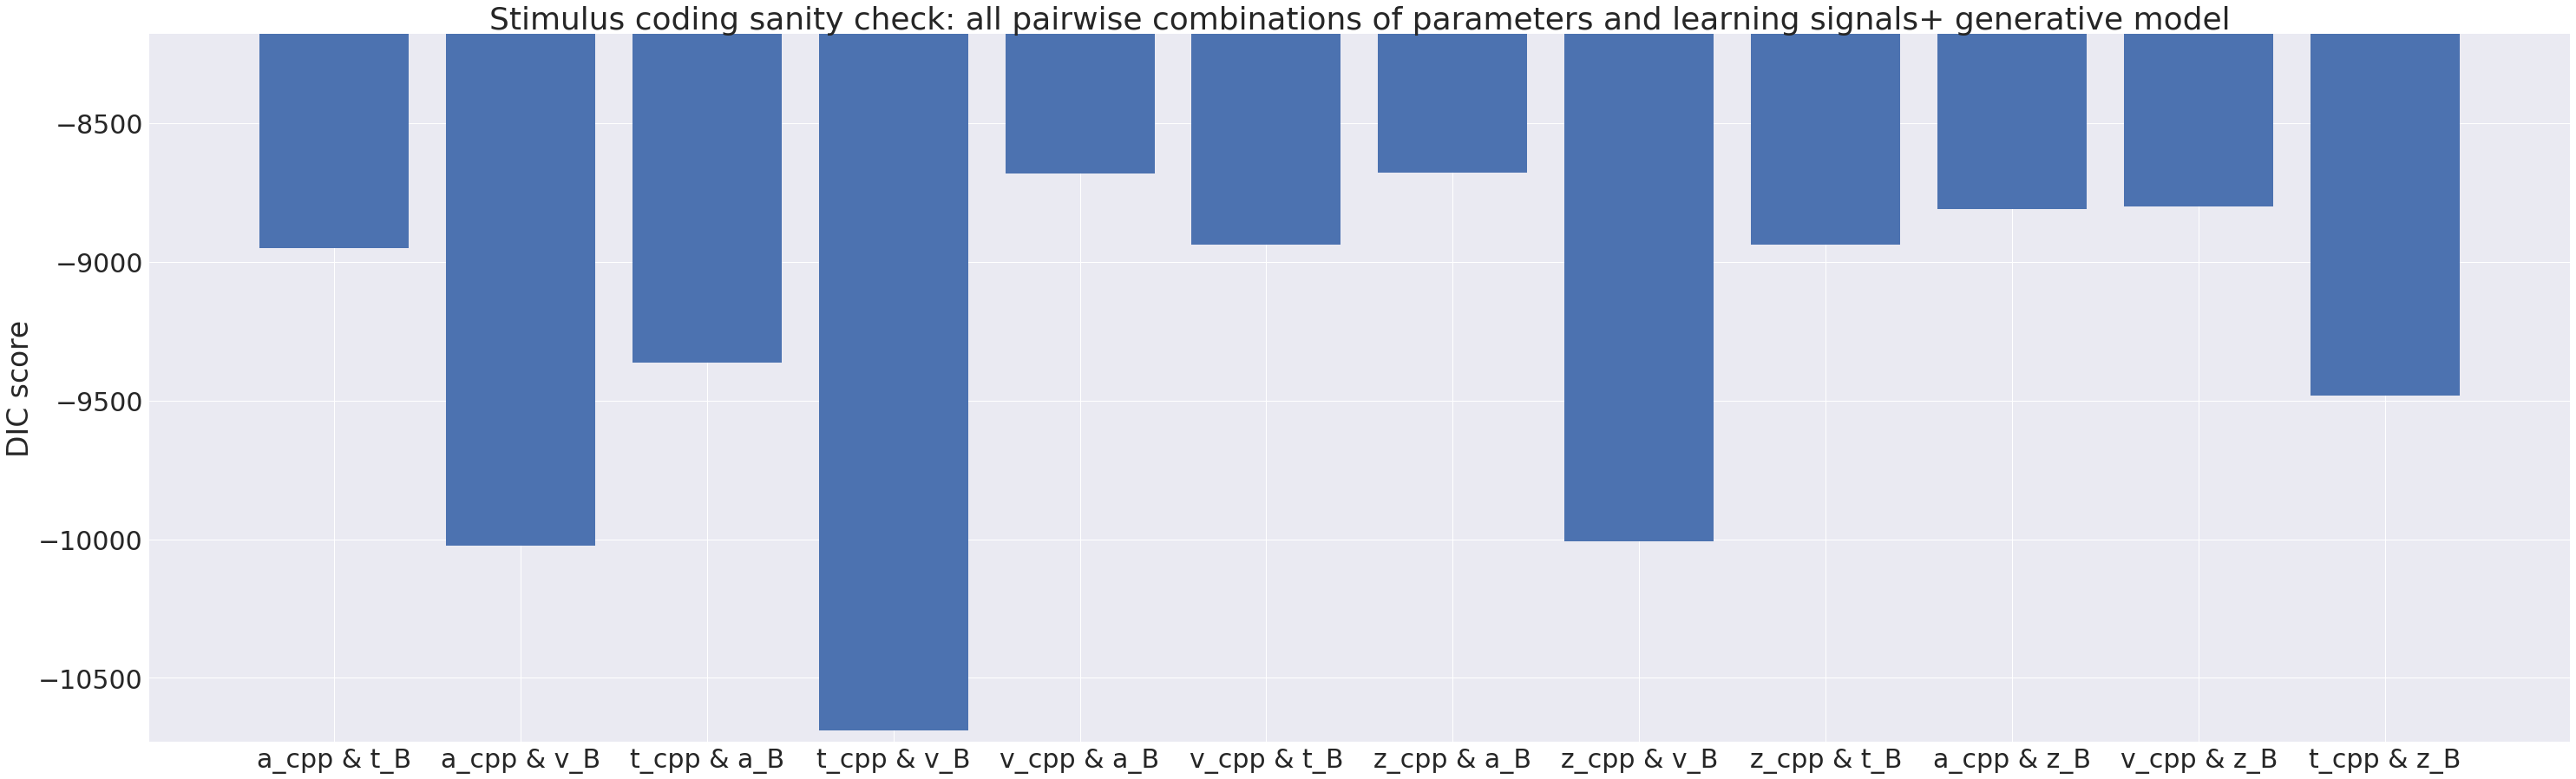

In [57]:
plt.figure(figsize=(50,15))
sns.set(font_scale=3)  
plt.bar(m_names, dics)
plt.ylim(min(dics) - 40, max(dics) + 500)
plt.ylabel('DIC score')
plt.title('Stimulus coding sanity check: all pairwise combinations of parameters and learning signals+ generative model')

# Plot posteriors of regression coefficients

In [69]:
#plot posteriors for winning model 
v_hc , v_hv ,  v_lc , v_lv  = t_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


t_hc , t_hv , t_lc , t_lv  = t_cpp_v_B_obs_reg.nodes_db.ix[['t_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 
                                                             't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]'],
                                                          'node']

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [53]:
# #plot posteriors for gen model 
# v_hc_gen , v_hv_gen ,  v_lc_gen , v_lv_gen  = a_cpp_v_B_obs_reg.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
#                                                              'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
#                                                           'node']


# a_hc_gen , a_hv_gen , a_lc_gen , a_lv_gen  = a_cpp_v_B_obs_reg.nodes_db.ix[['a_cpp:C(condition)[hc]', 'a_cpp:C(condition)[hv]', 
#                                                              'a_cpp:C(condition)[lc]', 'a_cpp:C(condition)[lv]'],
#                                                           'node']

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


Text(0.5,1,'Posteriors of cpp-> non-decision time effect')

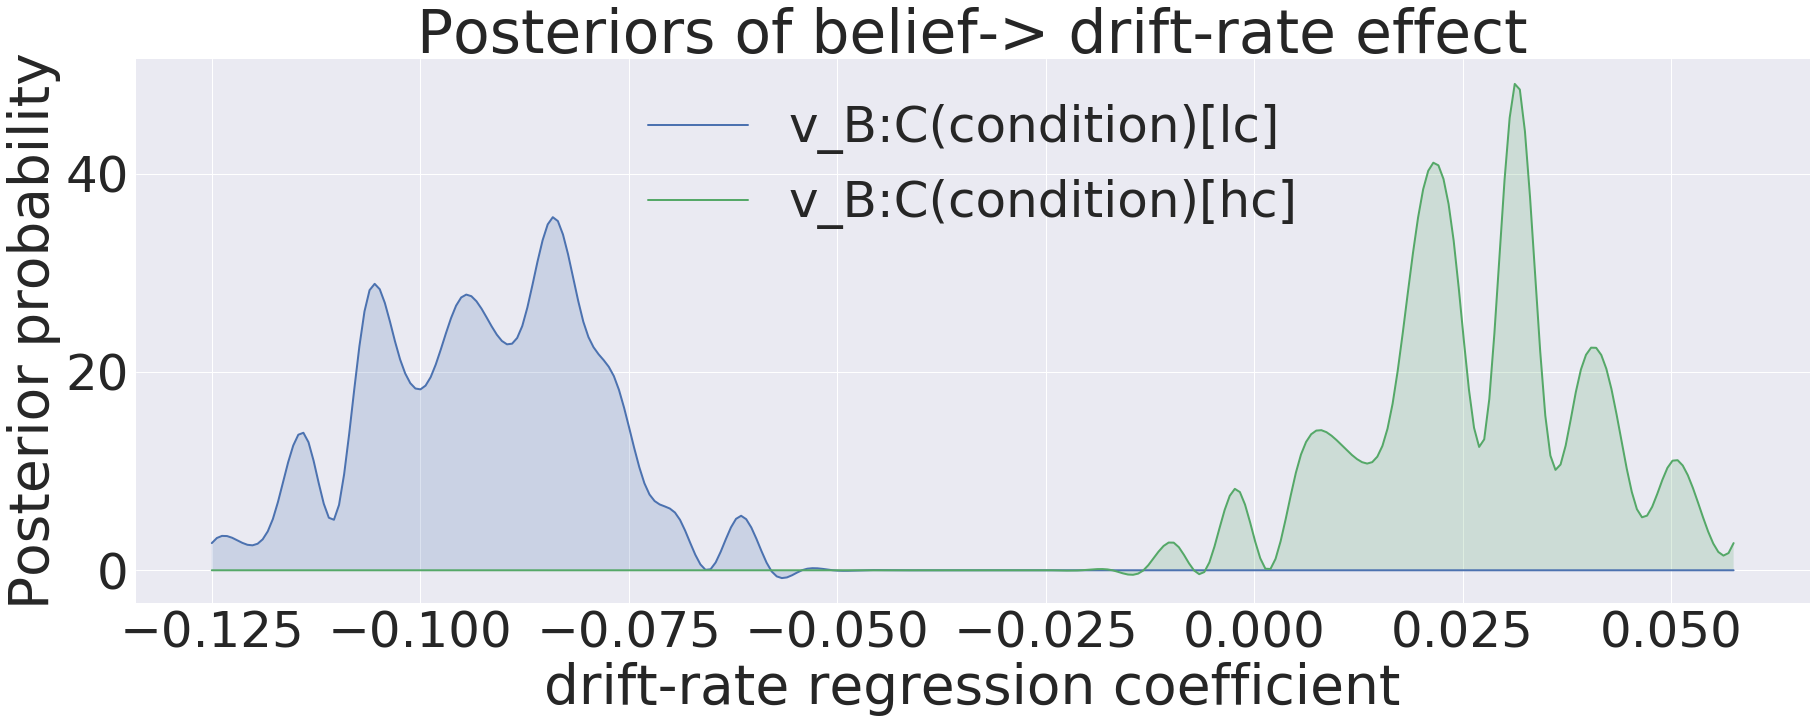

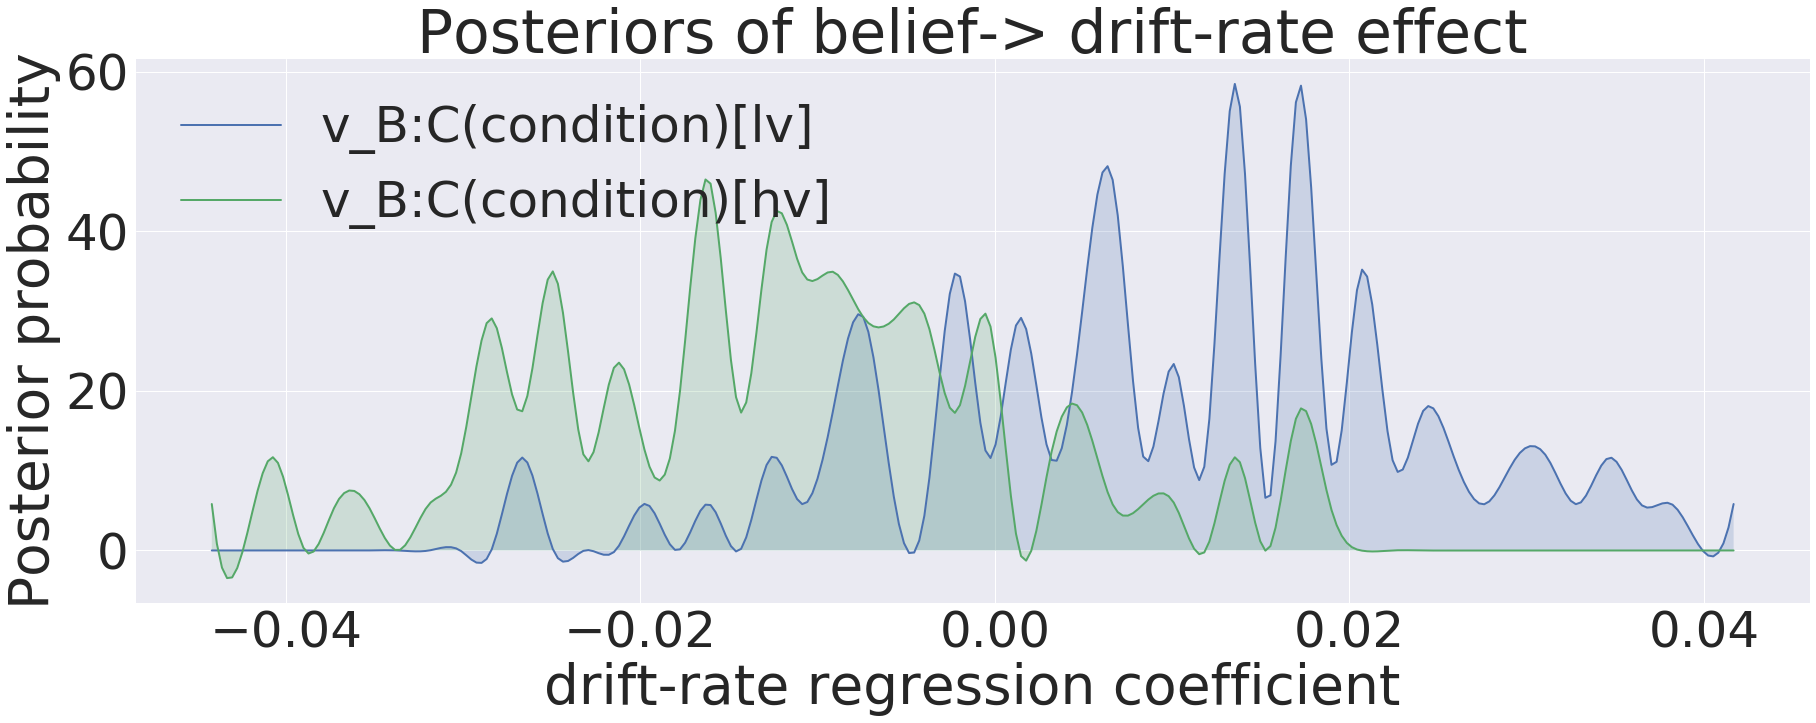

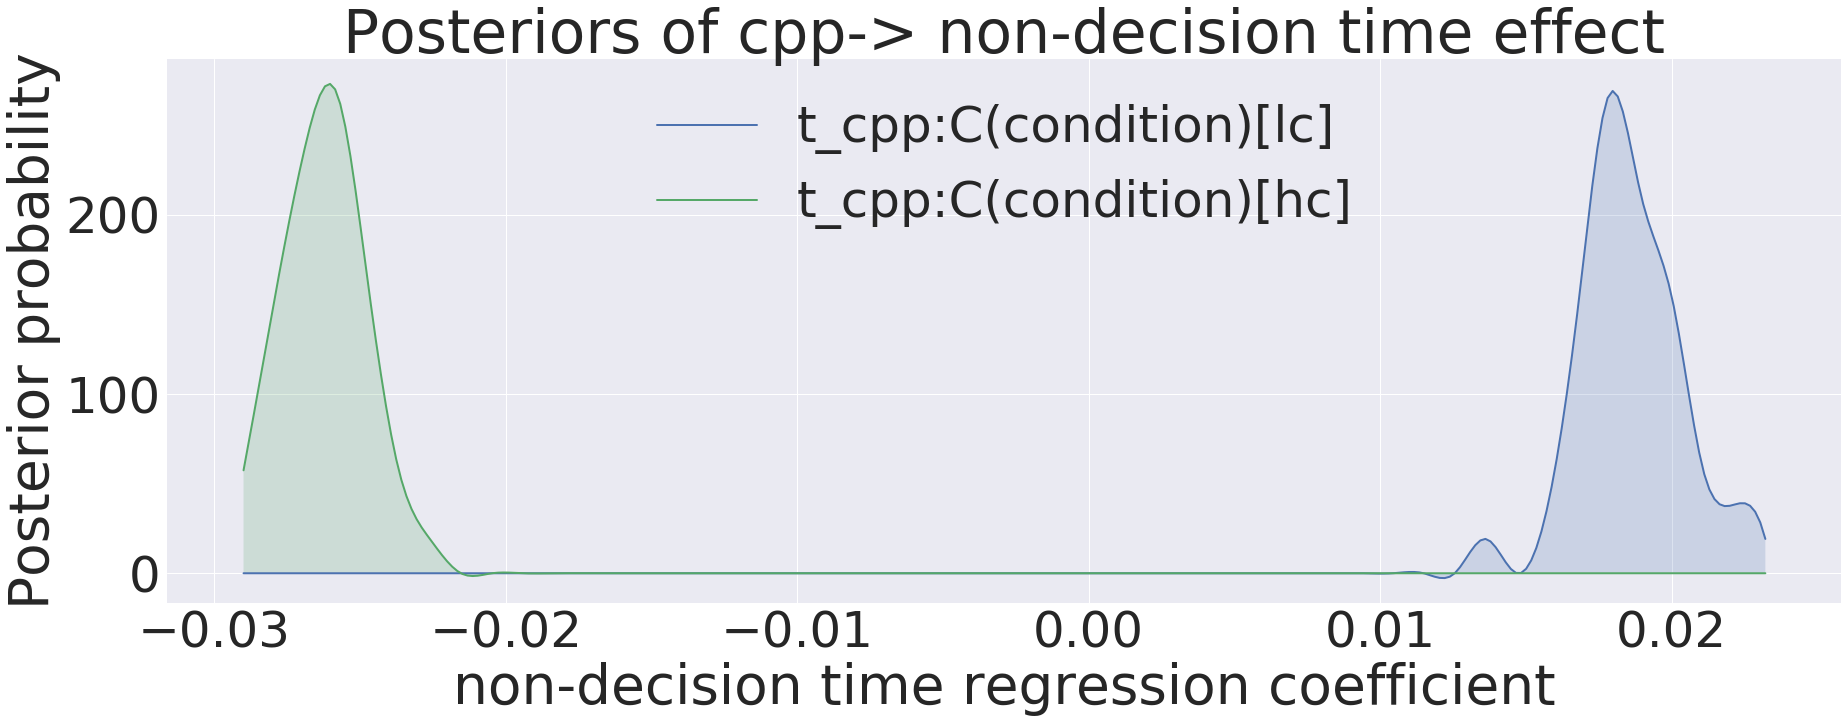

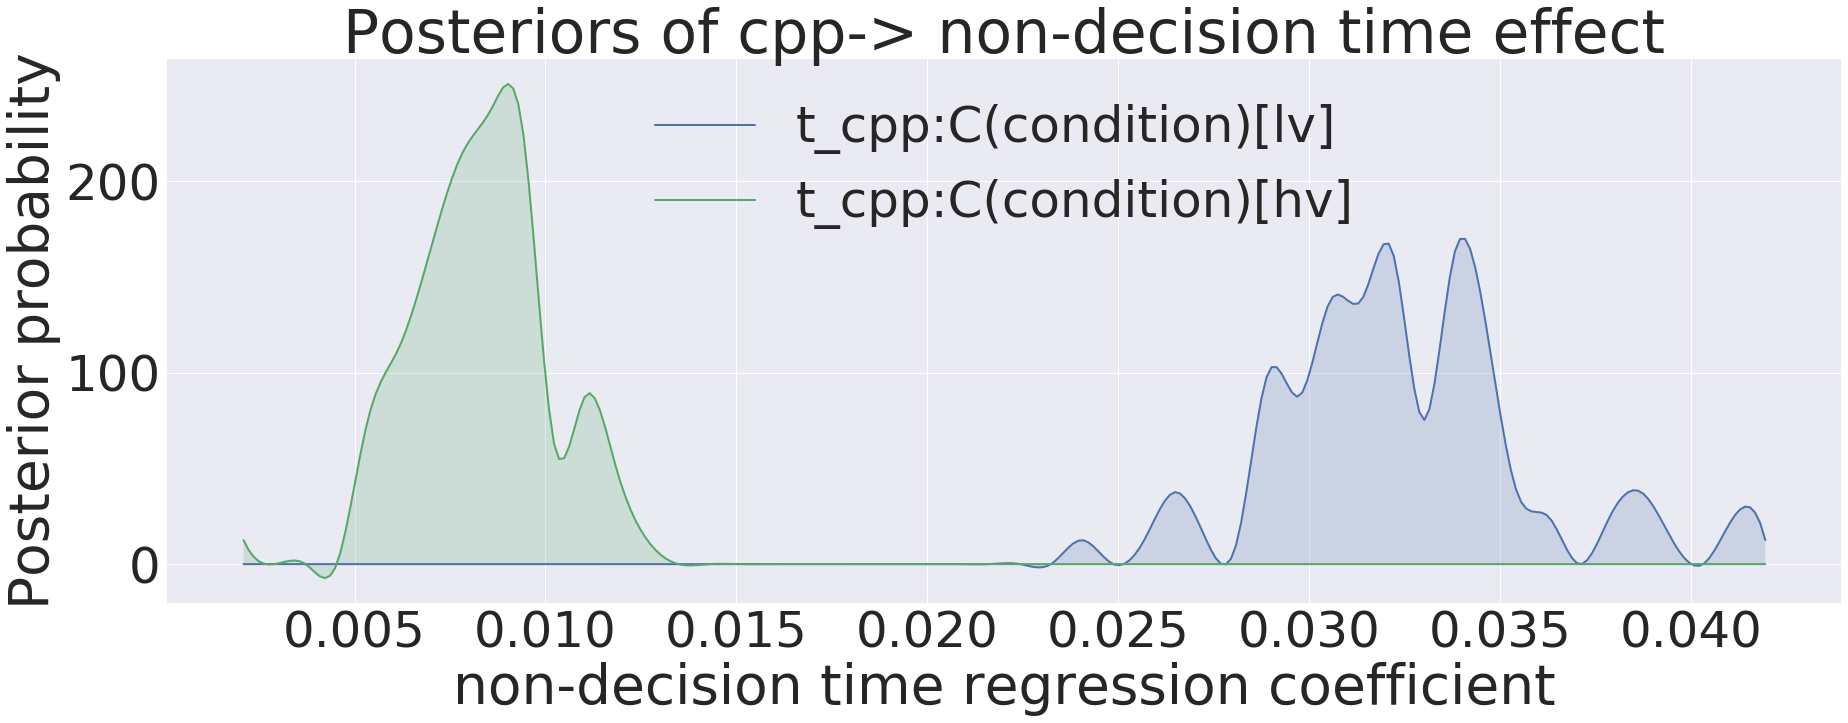

In [70]:
hddm.analyze.plot_posterior_nodes([v_lc  , v_hc  ])
plt.xlabel('drift-rate regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of belief-> drift-rate effect')
# plt.savefig('600t_drift_conflict.pdf')

hddm.analyze.plot_posterior_nodes([v_lv  , v_hv  ])
plt.xlabel('drift-rate regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of belief-> drift-rate effect')
# plt.savefig('600t_drift_vol.pdf')

hddm.analyze.plot_posterior_nodes([t_lc  , t_hc  ])
plt.xlabel('non-decision time regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of cpp-> non-decision time effect')
# plt.savefig('600t_bound_conflict.pdf')


hddm.analyze.plot_posterior_nodes([t_lv  , t_hv  ])
plt.xlabel('non-decision time regression coefficient')
plt.ylabel('Posterior probability')
plt.title('Posteriors of cpp-> non-decision time effect')
# plt.savefig('600t_bound_vol.pdf')

In [123]:
import pymc as pm
import numpy as np
import pymc.progressbar as pbar

def _parents_to_random_posterior_sample(bottom_node, pos=None):
    """Walks through parents and sets them to pos sample."""
    for i, parent in enumerate(bottom_node.extended_parents):
        if not isinstance(parent, pm.Node): # Skip non-stochastic nodes
            continue

        if pos is None:
            # Set to random posterior position
            pos = np.random.randint(0, len(parent.trace()))

        assert len(parent.trace()) >= pos, "pos larger than posterior sample size"
        parent.value = parent.trace()[pos]

def _post_pred_generate(bottom_node, samples=500, data=None, append_data=True):
    """Generate posterior predictive data from a single observed node."""
    datasets = []
    ##############################
    # Sample and generate stats
    for sample in range(samples):
        _parents_to_random_posterior_sample(bottom_node)
        # Generate data from bottom node
        sampled_data = bottom_node.random()
        if append_data and data is not None:
            sampled_data.reset_index(inplace=True)  # Only modification of original Kabuki code
            sampled_data = sampled_data.join(data.reset_index(), lsuffix='_sampled')
        datasets.append(sampled_data)
    return datasets

def post_pred_gen(model, groupby=None, samples=500, append_data=False, progress_bar=True):
    results = {}

    # Progress bar
    if progress_bar:
        n_iter = len(model.get_observeds())
        bar = pbar.progress_bar(n_iter)
        bar_iter = 0
    else:
        print("Sampling...")

    if groupby is None:
        iter_data = ((name, model.data.ix[obs['node'].value.index]) for name, obs in model.iter_observeds())
    else:
        iter_data = model.data.groupby(groupby)

    for name, data in iter_data:
        node = model.get_data_nodes(data.index)

        if progress_bar:
            bar_iter += 1
            bar.update(bar_iter)

        if node is None or not hasattr(node, 'random'):
            continue # Skip

        ##############################
        # Sample and generate stats
        datasets = _post_pred_generate(node, samples=samples, data=data, append_data=append_data)
        results[name] = pd.concat(datasets, names=['sample'], keys=list(range(len(datasets))))

    if progress_bar:
        bar_iter += 1
        bar.update(bar_iter)

    return pd.concat(results, names=['node'])

In [127]:
#simulate rt and accuracy data from the winning model
# ppc_data = hddm.utils.post_pred_gen(t_cpp_v_B_obs_reg, samples=200)

ppc_data_new = post_pred_gen(t_cpp_v_B_obs_reg,samples=200,
                                          append_data=True)
# ppc_data_split =  hddm.utils.post_pred_gen(t_cpp_v_B_obs_reg, samples=200, groupby=['condition'])

/home/krista/anaconda3/envs/hddm/lib/python3.5/site-packages/ipykernel_launcher.py:45: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


 [-------          20%                  ] 5 of 24 complete in 3680.2 sec

KeyboardInterrupt: 

In [ ]:
ppc_means=ppc_data_new.groupby('node').mean()

In [110]:
ppc_data

rt
node     sample                
wfpt.761 0      0     -0.502278
                1      0.311077
                2     -0.374846
                3     -0.205729
                4     -0.306363
                5      0.582861
                6     -0.538323
                7      0.186950
                8      0.727888
                9      0.767654
                10     0.382970
                11     0.552971
                12     0.288023
                13     0.263486
                14     0.296113
                15    -0.329904
                16     0.288104
                17    -0.209698
                18     0.256849
                19     0.225735
                20     0.585489
                21     0.224258
                22    -0.252041
                23    -0.323665
                24    -0.274158
                25    -0.806729
                26     0.332959
                27     0.240822
                28     0.498643
                29    -0.282620
...                         ...
wfpt.784 199    57570 -0.502255
                57571  0.825775
                57572  0.239001
                57573  0.451845
                57574 -0.271036
                57575  0.296793
                57576 -0.284934
                57577  0.251001
                57578  0.373323
                57579  0.336010
                57580 -0.713974
                57581  0.141661
                57582 -0.278255
                57583  0.756261
                57584 -0.310532
                57585  0.333508
                57586  0.181729
                57587  0.339124
                57588  0.386916
                57589  0.242835
                57590  0.318456
                57591  0.299404
                57592  0.352502
                57593  1.043596
                57594 -0.250957
                57595 -0.182898
                57596 -0.252290
                57597 -0.347283
                57598  0.192013
                57599  0.346737

[11520000 rows x 1 columns]

In [120]:
#add the simulated response (rts flipped by response)
ppc_data['response'] = np.sign(ppc_data.rt) == 1

In [122]:
ppc_data

rt  response
node     sample                          
wfpt.761 0      0     -0.502278     False
                1      0.311077      True
                2     -0.374846     False
                3     -0.205729     False
                4     -0.306363     False
                5      0.582861      True
                6     -0.538323     False
                7      0.186950      True
                8      0.727888      True
                9      0.767654      True
                10     0.382970      True
                11     0.552971      True
                12     0.288023      True
                13     0.263486      True
                14     0.296113      True
                15    -0.329904     False
                16     0.288104      True
                17    -0.209698     False
                18     0.256849      True
                19     0.225735      True
                20     0.585489      True
                21     0.224258      True
                22    -0.252041     False
                23    -0.323665     False
                24    -0.274158     False
                25    -0.806729     False
                26     0.332959      True
                27     0.240822      True
                28     0.498643      True
                29    -0.282620     False
...                         ...       ...
wfpt.784 199    57570 -0.502255     False
                57571  0.825775      True
                57572  0.239001      True
                57573  0.451845      True
                57574 -0.271036     False
                57575  0.296793      True
                57576 -0.284934     False
                57577  0.251001      True
                57578  0.373323      True
                57579  0.336010      True
                57580 -0.713974     False
                57581  0.141661      True
                57582 -0.278255     False
                57583  0.756261      True
                57584 -0.310532     False
                57585  0.333508      True
                57586  0.181729      True
                57587  0.339124      True
                57588  0.386916      True
                57589  0.242835      True
                57590  0.318456      True
                57591  0.299404      True
                57592  0.352502      True
                57593  1.043596      True
                57594 -0.250957     False
                57595 -0.182898     False
                57596 -0.252290     False
                57597 -0.347283     False
                57598  0.192013      True
                57599  0.346737      True

[11520000 rows x 2 columns]

In [121]:
ppc_compare = hddm.utils.post_pred_compare_stats(all_obs_data, ppc_data)

ValueError: Incompatible indexer with Series

In [107]:
ppc_compare

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.543906,0.553898,0.064643,0.000100,0.004278,True,53.020832,0.154575
mean_ub,0.330749,0.371280,0.033986,0.001643,0.002798,True,11.354167,1.192560
std_ub,0.105796,0.202464,0.036447,0.009345,0.010673,False,0.000000,2.652261
10q_ub,0.235720,0.186165,0.022656,0.002456,0.002969,True,95.833336,2.187288
30q_ub,0.275785,0.243298,0.022612,0.001055,0.001567,True,94.500000,1.436761
50q_ub,0.305632,0.312397,0.027542,0.000046,0.000804,True,43.270832,0.245610
70q_ub,0.346090,0.414939,0.040701,0.004740,0.006397,True,5.375000,1.691611
90q_ub,0.460045,0.634116,0.076665,0.030301,0.036178,False,0.104167,2.270539
mean_lb,-0.330385,-0.357044,0.035621,0.000711,0.001980,True,77.458336,0.748392


In [ ]:
# model_names_header = ', '.join(m_names)
# print_dics = np.column_stack(dics)
# np.savetxt(write_dir+'sim_test_gen_model.csv', print_dics, header=model_names_header, delimiter=',',comments='')